In [1]:
import cv2
import tensorflow
import numpy as np
import keras
from os import path
from flask import Flask, jsonify, request
from keras.models import load_model
import base64
import io
from PIL import Image
img = cv2.imread("./asuka.jpg")

Using TensorFlow backend.


In [2]:
img

array([[[195, 189, 190],
        [194, 188, 189],
        [196, 190, 191],
        ...,
        [183, 181, 181],
        [182, 180, 180],
        [182, 180, 180]],

       [[194, 188, 189],
        [193, 187, 188],
        [197, 191, 192],
        ...,
        [182, 180, 180],
        [181, 179, 179],
        [181, 179, 179]],

       [[195, 189, 190],
        [194, 188, 189],
        [197, 191, 192],
        ...,
        [182, 180, 180],
        [181, 179, 179],
        [182, 180, 180]],

       ...,

       [[228, 226, 225],
        [228, 226, 225],
        [228, 226, 226],
        ...,
        [132, 159, 196],
        [138, 165, 202],
        [142, 169, 206]],

       [[228, 226, 225],
        [228, 226, 225],
        [228, 226, 226],
        ...,
        [132, 159, 196],
        [138, 165, 202],
        [142, 169, 206]],

       [[229, 227, 226],
        [229, 227, 226],
        [228, 226, 226],
        ...,
        [135, 161, 198],
        [140, 166, 203],
        [143, 169, 206]]

In [3]:
print(img)

[[[195 189 190]
  [194 188 189]
  [196 190 191]
  ...
  [183 181 181]
  [182 180 180]
  [182 180 180]]

 [[194 188 189]
  [193 187 188]
  [197 191 192]
  ...
  [182 180 180]
  [181 179 179]
  [181 179 179]]

 [[195 189 190]
  [194 188 189]
  [197 191 192]
  ...
  [182 180 180]
  [181 179 179]
  [182 180 180]]

 ...

 [[228 226 225]
  [228 226 225]
  [228 226 226]
  ...
  [132 159 196]
  [138 165 202]
  [142 169 206]]

 [[228 226 225]
  [228 226 225]
  [228 226 226]
  ...
  [132 159 196]
  [138 165 202]
  [142 169 206]]

 [[229 227 226]
  [229 227 226]
  [228 226 226]
  ...
  [135 161 198]
  [140 166 203]
  [143 169 206]]]


In [6]:
img_numpy = cv2.imread("./asuka.jpg")
img = cv2.cvtColor(img_numpy, cv2.COLOR_RGBA2BGR)
img_gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier("./haarcascade_frontalface_alt.xml")
face_list=cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
#顔が１つ以上検出された時
if len(face_list) == 1:
    for rect in face_list:
        x,y,width,height=rect
        img = img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
        if img.shape[0]<64:
            continue
        img = cv2.resize(img,(64,64))
        img_only_face = img
        img_only_face_base64 = base64.encodestring(img_only_face)

/Users/yuichiro/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: encodestring() is a deprecated alias since 3.1, use encodebytes()
  from ipykernel import kernelapp as app


TypeError: expected 1-D data, not 3-D data from ndarray

In [7]:
img_b64=/9j/4AAQSkZJRgABAQAAAQABAAD/4gKgSUNDX1BST0ZJTEUAAQEAAAKQbGNt cwQwAABtbnRyUkdCIFhZWiAH4gAFABAABgAmABFhY3NwQVBQTAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtkZXNjAAABCAAA ADhjcHJ0AAABQAAAAE53dHB0AAABkAAAABRjaGFkAAABpAAAACxyWFlaAAAB 0AAAABRiWFlaAAAB5AAAABRnWFlaAAAB+AAAABRyVFJDAAACDAAAACBnVFJD AAACLAAAACBiVFJDAAACTAAAACBjaHJtAAACbAAAACRtbHVjAAAAAAAAAAEA AAAMZW5VUwAAABwAAAAcAHMAUgBHAEIAIABiAHUAaQBsAHQALQBpAG4AAG1s dWMAAAAAAAAAAQAAAAxlblVTAAAAMgAAABwATgBvACAAYwBvAHAAeQByAGkA ZwBoAHQALAAgAHUAcwBlACAAZgByAGUAZQBsAHkAAAAAWFlaIAAAAAAAAPbW AAEAAAAA0y1zZjMyAAAAAAABDEoAAAXj///zKgAAB5sAAP2H///7ov///aMA AAPYAADAlFhZWiAAAAAAAABvlAAAOO4AAAOQWFlaIAAAAAAAACSdAAAPgwAA tr5YWVogAAAAAAAAYqUAALeQAAAY3nBhcmEAAAAAAAMAAAACZmYAAPKnAAAN WQAAE9AAAApbcGFyYQAAAAAAAwAAAAJmZgAA8qcAAA1ZAAAT0AAACltwYXJh AAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW2Nocm0AAAAAAAMAAAAAo9cA AFR7AABMzQAAmZoAACZmAAAPXP/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcH DwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/b AEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/CABEIAZABkAMBIgACEQEDEQH/xAAb AAABBQEBAAAAAAAAAAAAAAADAAECBAUGB//EABkBAAMBAQEAAAAAAAAAAAAA AAACAwEEBf/aAAwDAQACEAMQAAAB9HSXTypJAkkCSQJJAnTA6ZwTOgZMAC0M PkMpu80wVqhDG2EFGDzmhkeaJE25a0MA067hMg4dXu+cdDbl9ElzXQwqRJ0d OyBnSBJIEkgSSAKdMqZ0DJ0DJ0DOkDO7AmdgeMqQE4wWJHqiFUks4DBog3mJ pxiSLpEk1uSYbsppjMlQSs1GQxqxNXqOl826ukPQSYe5GjpOjJJGpOjGTuDJ 0AE63GTrRk6wZOgZOgZSYIqQ9wHF6nNS6atM2dHqY8YMo4O7oGEiNMRZUwkz s6TRAbk7lKStrNRuzrRk8OnlIerPc9G6LzD0QntSEaNYqTYJ0gZ04MnYAKTM rJ0CSQJOjWToGScI5F7msfMyj53D6VcRbdEqVis2DBYZkZmQAAVnlMZYbkwG A6HirOMKVa/gWlq5TZJ4zrEveef6OHq2niaaLZSSOnSBJIEk4ATrcZOgZOgS dAydjWT0wzee1eZ4fSpQOAcR7NAKkpTog4XK2AK5wUnXtMZkrTFf0z3ebTDp VnxgnLX1Y7mRvI3NynDq5lZrFze56ryz0sTfQjSdnSBJ0DJ3wAnTYzpAzpAk 7AzSiDZtvG5OvAzzx5PQqCtWWyvlaAHWvN4MoqlwVECEsnWxR0KJjltVAYel X3Bi3cw1s7YxaQvHriw0M/oMTSsRg357/ccNuZnoevzu+uTTujsnQMnQBTrV ZOgZpIIp2BJ6+NW5XcwfM9SvG5XhejYJBzOhar2TPPX0XnWrXqDAbhdBdzY2 LoUKt1ny5S6TIm1/n+hx8Kubv4HVyvBiVjfHUtytRDZh18a1cLUw9K1Me/s9 5J41ZO+kU6AKS1UkgZ0wMkjFmaGVLozqha/j+oBOTGrgtV30WPuc/eb7dnPU zGjo1S7DXHzUoV71d9p3w6bo1G3Fdjk2wUU3LdPzFoxlXtdPNW0cq0rGGmrI N4CafoW3xPe7PberbnVk6zUzoAJ31Ip0DM7AydblbIv4vJ10h1z+Z6MyxMu0 oFsbudnWb9UHkaPNtkej5Xr6JqADQjS/INhtydfG3XzMmqOkWHeotLB6PArL MsAfo5EnEZbYaNuRGZ57HqXkPrQi2sPbB07IySWgVJtRndBBpxCMniGVg7/N 8HeKFnM4e2/dBNcp3qJ93PHcg2A41j9/Lr69SxDooQ1k5RHvpNwukpbybh4H Y8e+BtivVTIy+op0nywdrPvzMC6DQExyactHNs7l71Dy70IzotXO0hHTsjpO wDTp1TOgi00ZGrarBW5Xpec83vjlXsjl6+iCQKhhwkbSx73GdcB6Ve13Q0w9 BSi+FtYHVOX9Dm+r4eq9pjvNz8/w3oHIZbP2MstDq8XN5jImqaDdS1qt0TZm QsieDu7hd7Xiuj1fTrlK5sppkrOkggzpsZ0wOyQV5QmZkc5uYXl+jSzbFJbd HWtUJPoOF8zmuf14elzXewN0E2EC8Kec9n9QPK8b2VrRdJzTUhk8v1PPrenj 9ECiSztW3J+VyetqWzmZ9PnavN1rdN5zTrNJt4WuJ6rex765cVVblpVYBani ntDTbPEGjHIKrarArhjUlPx/V5dg3ehdyrbz4OYubo6cd0/I+ndkOiNMmSrD siNFJp5szQKyPCcNM3D3sMoF2luxU3CEiyCjmbmWu8Tia+H18mqOvJXv26Vh H9XvYWki3VWky2YQWaGSSPGKjuOOVY21lqzF8x6x+Pp5i/naXQujj6FBGnp5 Opu8X6p5r3vVz9tJEbmrhtiVqyJDHKURmWMZwCngdBh7SlOEhizae4pJZgsz R59W4XOIPt4HuUzhPYxNaVvRrUSYEMMhkpimupjShUDHFoLMumNHU0cZGxtH G2+a/LX8vbspqxCRrnauPqPnO9NjR6+f2U1K5vNERh4CGaKVezXZ0sBqWs2l i38FbWAOqFggybjwkJQHCdl5gy0kz9fDKwCxjD1czWnX1JjCUNOBzUiKbTEf Ji5oYu+xZqaGOuyyyCR6do1OFec6fF6BtzkzzpRuVbFMDznTcx1c/s21yPVk ijkzSgndWg8loqh85GoYXXY21qldqrKY5LsgTro3O+e7uH18jO86wcqmri3s jcnXudjHtQpfIJzDIMgfK16wc10I7O5YyNWjN8pXxI7Zm7lTejt5t2NMUgrG UpDOC2Vay0rT6PtuG7YidRTwFPPFOu1Wq52NaFkhn1amXhA6TqH5y3sdp4SR VgafnLrmM8e3gmRF0mSZJ2lpjuwt2ZAWVxHqGA7s4FjJu/hHJI0gZxXYCsJW Ve6yvza0cfzu6pdFY474sVPpyhaC1M7jpa1jeYrwk6J0jGq2xZuLW2MmXZz9 DYPd6V00cgwZcXmVcK1X7OKCk9ZTth00qO2HqJVFHdw+e29arntB5umWbxdG tpm7uB2ZtJtFA84LCbQc0PM9Jk8vXVSXlejQIM7tQFY3KL3MpQrwwk8caait HhJlK9S3SStMBhswhlyw57ldKv2cwYld1qzewyWdW7YlXH7bnO0MFyvWcnG2 8WB7QOivWQkZl2LRbp5HTLck8EbNRWEkwzQU9OrHozIDN4/q5lnP0Nap33Ke h1iQRYV5WaTKw1MS7NgQGegastBRevjRzr1FGfK7nnOzm4S51IKpw15tfTq2 0QvHD63F22UHJdNgzr0wrYbc5md9VM6NqqL0i7DtjAQFuWFGRklF8JAMkrz2 Vq835HsA6VtebaPR1Ll+RRk1JszsrNAkF2tS0Kkq54bYkrWRVpCJSblfM2M3 qlfrktdnHw9rcyYdHZRkbq4c+xCeNimzunSid3rBkkYkkBMUufw+hlaAO26o Y4+jxAZoLo45PVhm3s8oeLvpWbBeboLo5xJ7vm5mxeO8qlnMSilHjKBoq1mv KlUNgC0E7vondNigRrJTayN1KFEvElsBrcrVLOlN4aClz2r4/QYd5DUV0c8l FwBl9BQ8j1uoebdfLSy9XOZqFa0Om86a3nRpdJVKFkla7gRxOpJ1YCvbBBN3 Tc6ae7bULOEq5hLoA2RKwUk2umfRJJ1gpLQcStpVY9W0rPW8d2LRGasabEzN NOvH2tipeNNxPWWT0HPdF5Xrbbs3TyC5bRy5dBw1OXyu/Uo39JEdmUtmoRlv DBezDaFDRkBBeFhWHfCu1zNLNJJj6QHdEpmTTszJ2bGTMEoyQDY8s2pG8NNN 0OBv252GVUlBnqKwsavS6FvWM8vVxNs173letrYmmCkZYvS8+lMzkO05LLjv 07GGmUFx5xNb11Ma7ajMiG25lRTkxMViZmaQsjTHgYWNe2EM5zvrUo3HNrEM lIvIW4MUyZohHpzZ+o53avGEqt1SYbQ6T46ZD9SWcjrs7U//xAAtEAACAQMC BQMEAwEBAQAAAAABAgMABBESIQUQEyIxICMyFDAzQSRAQgY0Nf/aAAgBAQAB BQL+lmridIhecSbU8kklYAotRJoms1mgzZDNSSNUTZp4W1JczJUM7OtreUGy P7ppjtecRxUszyNjClqY1mscxQFCiGFK7UszZWYaULxVbXiTC3meClII/tmn YKL+9MtYaSnfTTnbPNuYHI1rAorlcjkjEcuH3magmMJjdXT+1czJEt5dGUtu Wffdi45ACmOTjkFoms8kGqk1AyxhkBNAlazy4bddSrV9BG/9meTprfz5c0x3 8laehvT0By0hRq3/AGorJpcih3xxSDRNCpoEo3igcGNmR7ScTwW5OP67kKt1 Ls4p2pzS9qknSfj8VAzRBNDCh2zUa7ZyR8jvyzpYnBBBp2yd15LXDLo206HR Sn+vdS5M51GeXKMaRNTSEav8AU3c4Ax5o5Y7Zk2AFfFVOlsAp/iA9xzG06hg DXjkK4FP1YoCUYeP6l0/TimJxcPWxZt204D+T8W2Cx4DdxbAEjbW4yT3Mm7y b1+4jv0yr+C/uQWREiSLpKmv0hq2laGUOJ7eBtS/1JT1J7qamortEMtKcUKG MQoXZ2MhOEo0d6XtQ7LCKfzjdRvC2qphpa0y1RsY5OJwihQ25Ka4BcgGD2pf 6dwTpuG0xztknamORGmmOQ6pPFaC9S4NOdIApvKruRse9sYQDJb8iirb88o1 LgxvdAF7I/U8LkXBoUuxtn6cofqwRMHT+idg5q7fLHcyVCmal+A3KLl11KNg P3QGawMv4hWptkjXtI7lX24l75QXGrNS/HhLmK84jH0rnGzUncE8cEuNrc9O f+jITV1LgfNjktP3VGBpuzWmsALq1U1Ywr0BT5FEa5AuKl3rSdLrv0cQxeIP zEUN7XOmSQCa3jGeXhhXCn0z6vaibXH/AEHba7bU2nNSbUwzIMCnAabepG3j TFYzUxwQvbGraZ92t49Ky46QGqWNctozJcn2oEGmb2ryYe9beUGRaS6ood7m pBULVbP05ocB+Hk4+/cNiOY4jA7tOFbcqMPWjtY4MQqMe2+1fJ1i6lXHaZI2 LSgCgvUeCPDRIqxfK6vO2BFxXFxiWXZ12MxxKh0Sxb3bfKl7ZFqz9+wibF79 +buN01KoAdiz/wCxQOW8h9zar1DL2VKd4E7raPC9M61G75wgKLZx90je1Zp/ J4j8dwOIrrSfyu9S90RNQEGSb8v7lqI7f87JVz2L959ldtpPLmo194DU82yP 4n7kuAc28Aijch5XzVmgkaQa3092Kdd5hpS3B6b7JaL7d+/a3iY5Fz+QHBHn /Ns3fLvIN1bdIK4S+LiXut7Rtdv92Y4WY6KZtKR9zxfjho7uRqnucdXh8PVl upaue1NWa4aNMersf8akuGAIuvA7UbeINiK83HipauPnQ3RvlEcO+51YYefi 9o2mXHUg4UfY+7c90l02ZrnGMdO3XAtyMRgEy2y7SZaPttraFDi8lDyxg1bg 9OSZMXE5aXrKI0ZOk3uzOtNvF1MSP3XDqOpcDFT1J5U0aX5qcrUZ2O6RHu4W 2uwte2T7pOqU+caprk5k8wvgUrBpZj0rSRNIPvXfE5xDFF3NbxajLJs2QUDM 5By6MBa5+pVdQZcVN2ux/ku1XEhIlyQ/mvI/0hwfDqdLKd49q4C+bKHZh9xy FVF9qKkGGkyXjBapT22A2vtzcN7lqot4bu5aeazOiomAgjhxXRFacVEiipE1 vbQHrRx4Eib3f5rZdbNCDX0harmyaKN4wrlcSFabyK8hvER2zXAH7cYA+5J3 O+0cH4pu1M6ryA5S4/HaDEJ755CDXFrnRbxCl2r6nErS3WIp5A0E7rHbS9Wl 2NqoNFMVcDFXCaprbZbcF0wqVxC6t9LlczgGsbSLsaFLuE2KVwJ6Ydo+34EX iXazh2iuzhLQ5mt8dKZjpgytnD+aRh0rl+tPEuyxl34XZvHJxkTRSxqBJarG ltazqJkU1bJgVfjtcYpRhVuDbxtctJbdPqS9LvMcZpPiRUi6TjcbFtjFuOEP pklPtL4+1NvT/G9OLXPZfnD8MNRH2Z9kkOLcHDX7Yht1zVtDqqytVUqNAlw1 S28euaMsPotdWsTaVGBV74ddwgq4iL3EHDoZ7aXhssNKjx1Muqo0aimKk3ob rjlCcNYfPXmGN/b11rrXWv1x9ztV+ds5kvDma1OkIcQzH2bnPXXuhusymzi1 GxtNICAURTKKaHNfT1HAoKjndeHrFNHmoS8VNMWDpmjb5PRAqZKn7SjAO/a1 DZuHn+RHvFD+H989daq1VqovTP2IdKE1OQbldquietb+H+Iw0jMW4rD8Mn6n g8GTGuBij6FocjU/hx6MVitNMKmFX+1Z3B1R5obpZt3W7DFufZJ3zyNK9B61 08lZatWWDVcyhIkr/M+rrWO9OeyJsyIWbikA9jObvhEY6aisUeYoUORqbw/r YVOK4me41A2Hk2KNUXa8LYt4W7S1ZrNZrTWmsVjkN5JZAgBL0MYc4DjVPYCr psBGZY4f/pR/+cjTc8EOYByIoisUKHon8P5oelqudhftqn5Z2B3Q5CD+PD8a U1mhWa1UTyNawpwZ3n2SE5eQ03bJYbG7NR/hs97wbxzD3v8Ann9peRo815mp viwpxutD0NXEpdETnJ5fr/Vsd4B7cezn0GsVjka09VgMVfH2rRu6UDpy4D8O +c/xhyILH/0Q/lu00j/nX7k8UaNHknnHJqm8FqbekoUORpztxmXc+eQ8fuDd 4R7Z/LQ9Jo4rHWZB3GuJtphh7ZpPxXZ9ywFXXyRdNvGCKH5uJjfg0um4hOV5 HmKkl0iO4Lu1XTVLMkdJIrKooc2qdsLeSdSfkOQGWtNza4e2dKAoCscjTHFF 63cquFzgs1X/AHKi1MfZlzVmipb3H52P8ZQCsm090OpbwnpXHDn1wj7Ej1ch 66HcqAVihzauLzdOA815fvh6Zbh8nTiIzSeObnadzUcpMkFGpj3g1dGtPsnu gK9yJ7EmNTLi1wehK2HR8VcjS3BHzAPWxpzu4yj+eeaNOduLzdSev3SjYClG WstqjQNVvIaBrNZrNP4mFKh6kFZ2n+ajUzCgO1Px6B1fEUgzFKPYGPpn+Yba 6TUnAHzAvORwgjYMMinmQU9wK6yGprtFT6hWOoGs8zXFLjpROctQFAVijssK dsG6R5EjqCyNvzIplrp7oK/TLk9PFSLSr2RJks3tXBxAGFEareMZRjiRlxUI 1R8BQrAvO8h68cFt0FKtiXIp3qQip5UBSePJmaoOvrHKeUIt3cGaWh5FRisb qmtwuEtFHSVtidyKBzWaz6BTbc5V7cbCHEs66Z38wAdPA0htMjjLzfOxyzcF VvpB6TU26uiU2gCbpUKhhrTykfA4pdGZjRpeSLWKt0Jq6i0W1tH7Cb23mh9s 7gbCrxMpK3twr7L4wBlx8rgVaZ+os002vIehlBqSOpYM01saSNV5scVxO81G UbgZJ8ilXeJd64ZECt6P49v21bj24d48fb/WeU34411suwkO7f8AoZfauxhe HRF5VGkH1tT0/Nq4ve4ON27qXaiMUgqCPNKm3T9+wj0RSAEEaZ7f4W/msVis fbuGCx8PWm/9L/kb8z7xTEMv/PQ5kYbA5B9TU9HyeV3KVF3E3XYbUqdr+Y1y bSHs6QKwLm9RdKyDsf8APCmlIfzenP2CcVgyM2oS3GA6DVPH+WPeK177Xgqa bGv3zzzen5ua05lu7XqF7YJYGPsljKmUd9suXso9Nto0PbJ/P81L8Auu9x2x D3fumhtUp0iHPWjOJNfucPbW8MOmNBpSv3zNaiK6oppVpmWiwpmJrFTk6oNK xcTlXN/aLDZNF7dyvu8NQfURriK4XuC6boeLs4Th2ZLs+IhhfvsM1MvTkuHb GSa4bGNNnAWuPW1PTCiOWKxXTXVk1HiW/wCK7pMmV4jBoayXFLipU1Rr3Ku6 8Sk0jhUPStzQHqNa1zGoNXXa0R7fSQMXEwNd8z/TBI7NNEVunTT1mno0RWOR B5SbRwRkVMxKKAw4jDqS3STEW4phpkJxUq9e6Hj1MEiq4y7TTdOuGxXLG5tp BUew9M7ZJhLVFGsVBM1axBayM+s01GjyHMjIxUi5SLKVkMXhy8BPJtwVfFlb LBEVFGNdPpbuaXUj29m8s3DgBHcJ1BLEVoUTTSqKWXUdYr90KVqDmtZqKdlp J0b0mmo0aPrPnFGo2IYMpNGraMAfvlcYSX0Kv0aCQ3l4EUJijUp3K1IuoYIZ TQNA1ms0vpimK0kqtyzyNGjR+1+3G4mZaFwrP+h55X8Jkiies8+Kr1LTgUGO cuxnxisGrxdgaU0DWaiiLg5U5pd600VrHJZWFJPQcGjRrFMPtmnFWEebw1uK U55z28clEIqvLqbNPNI68H/BymxoEokrOAZEq5lV+YoVG5Wnk10KhoCmWtNa aIoUvob7B9Gk1w9ferFFaWnbSDPiriXJiPLFcJ+NMcCWV5WaII9wMx5paStN YNDkKSJmWIFSOWN9NEcxSpWgU4r9+jetJrpmunWlRWcUasvz8ycVIwKvNktk lPPUwQK4f2saupS7QwiKOf5yfE+VqOlrFKmo/TmkhxS0RkeKzSnk1YpVpFoc nrTWmiKK0q1ihRo8sU1WrH6qhISxJoqGBjVUVa0V9OvTmjqNBQ2qXVot4hHR +M3yapB7gFJUZpath36K01poCmGa0UI6VaKijS0vNhR5YrFYrFYpqFYo1JXD VzLdP04bLe3xX6l/Eg2A3UbXMGqv/8QAJxEAAgICAgIBBQEAAwAAAAAAAAEC EQMQEiEgMUEEEyIwUTJCUmH/2gAIAQMBAT8B/THE32zgkMYziRlXslCExxlA jO/34sPzIYxjRx0lfslHi9Shx7RGV/twYr/Jj0yj1poTo6kqY+tVT/Zjg5yo 9KkUMa0+2P2MqyPoyL/lpoj+vDj4K9eiiqJCiVZRDoqpWQV3AarTVfq+mx32 9cRrsoaKJDjURx6OHoy/09NMyw7vU/RH9EY8nRhj0UUNC7JfwUBR7skrOJJd mVC9C7oap6Xv9GFEVS3MjGhdvT9FafszISMb7Mi70/YvP6eNvwaJvijH2XRY 9Myej0z5Jd6kiPn9N86+dMc+ciPSKOI+j4KHCRKBJHxqRHxrX0vp6Ws86VEE TUzG5RXYmTl2QfRyHl/69k/4NWjj2OI42hef0yqJ87muUi6ExSiSmvjUfWop IcUcT5GiK7HBHFHFHGRxkfbYoNsiqVHyLS+S9sQvHK/yOfVn/o2X4pa+Re9f 0bE9MQvGTtkTGxorxx+yJ8i0/wDRJdkSxpt9HFxfYo9D60jM6jpGMl0xaoj3 rErF4ZV8mRdiLLII5bRnlctJGNDXZWvuEJI5IxTQpC3XLoya4x4kMSZ9hDwJ DhWpy4oZEoihsvXI5HIhOmfcpGGdrfpknb3EhJP5JTQ3ZKSirJttjIR1i7Ji ZZZZYmWYZ8YNkXepOu/Fblc+yiu9ZXSowP8AFk5HI5eKMTIdKhmaX40LdCRR Qnbr4Q5W+iqIy7MsrZidQbOWr0otjVbh7I9LWSVvaI7bGjuJfOBdMbsyPjFR L2vpkOLHjTQ00Ri5GKHAUxy6KKK0vBjVii4von7MPsZkXW+X4uWlpQVFeNFe dE8KkLHwHr7JOPF0ZX+OscF8nBFFFFeV+SM3+tJWTnXodsfZExsvT6ORfknq y/DJ3I6RZJdk4H//xAAmEQACAgICAQQDAQEBAAAAAAAAAQIRAyEQEjEgIjBB BBMyUUJh/9oACAECAQE/AfgocqOzYnwiyUbIynEuMyUOvzInk+kIQiztw5UR l24TvySjXy5cnX2ojwi+bGjw7QuHv5JSUI9mLe2WIvlcXQ/Jjf1zJffx5cv7 JV9FidsbE7EWXxLaLtE5VUxO/k/JyUqQjvoi9DdiLIidsUtindmP/B7TiYZ+ 2nwia+CUuqszS2diyLJOiL+x5Bz1QpUKZjftMMr2PyPVnnh7XwZHolJyfCZi HPsyUqiKZFjY9RIeDAMmtGN64XwfkyqPNnao0jFG3Rn0qIQbK4asRj4+hcWS 9f5nhCH4K9xZjx/rh/6Pb2WkjvQ5WQds7JCyRIysXKJev81+CK9rfH2YMVuy RHpZkUX4MipkIaEqZOF+DH+NW5si9XxYmXTH6/y3cxL2UVsijF7Ykn2HETkb l5PHCY3MUzvwib0d2dmdmdonZH7ESmkib7Sseon0VpEtL0IfC9EPBQ/Aoleh k2PyS/k/5GS2kJDXC4XL4Whk0Ib9OUyrY/5JfyS2R3Aix8JqK2d1LwKQt84l cuGTI7Q+EyehMzumiZOWj/BGF/RFj5mQXFlmKNLhkxMvhYTJjsWNmeD8koMy DIDfXYvPFtMnkkvoWRibHfGOPZiGWSf2JWVxRR1MkLR+tNmfHTJCHuAuW2dq FPWhsinJ0iKoRJjMloxjK9FFGWHaaMkeotUR/mivrllCXEUoa4sZjVszx9yI Qo6nT1ZEZfNjsh/THx4LLOwpbNpX9sWkXY46McaMiuaK9DdeiXjZLcrJzvSM apcsfKRFmpH8yrhaIq3foX5ez9iqyOR8N0ZW5k4EcOyuL4fKIsUqG1JEfBmu tCMT3XPTfXhcOW+HXDYx8P1WQzNE8ncQnWz9yI7RjjT4lkaO74suy0hvmiho SK5sc6MLuPDlRjxX54cqGyUSjwLZK0b9TXooZVkF1ibZ1XkT0Y8m9n//xAA4 EAABAwEHAQYFAwIHAQAAAAABAAIRIQMQEjFBUWFxICIwQEKBEzJSkbEEYqFy wSMzUIKS0fBT/9oACAEBAAY/AvJUXfdVFtlEbqSSpJVB2dlms2mVAMbg5IuY 8LDayJQBbjaMtwsJOIb6j/QJcYCLbCABmVAJ5Va9iq2HbnVYHim2i+JYvJbt sof3bTdd8/Es/wAKRUedlxRZZnuandU+UcqG5diT2OL61CxWeV26kLE3NCyf 7FZSw7IOaZB83JKOIkM+nfquNl0uG0eFTNZQsbf9w2ULEECFjGX4Xw3Oh+hW wPzDnzXKwCp1N8BYG+54VFRYVRQFz2NlIUtd3hog8CY+YaqWuzyUEeykVBXV BzTUL4mHi0Cgmo8xJUnNFxyvk5lFqauTdSl+JUQuBCxtXxm0GqwGK1Ch+YyP YDvQaOCBBlvpPHmIGiLiaLCKN/N1UYylOcq9TdKn73blQuqlBEt+12B3yuFV Ds2FYmrhcXn9M81bkjZu9vLGM1G+ZWAZTVV+ULrdCPULDqpdkoXH5UCgUorF cEZWDPZTym2mo7pRsnZgU7EJto3NqZbszFVPlS53+W1F1+JBTqjwidBqos8l Da7lVvi+LsJzbkeEQU6z+qiDk23Z8r/zdxdK+C72TrPTNvlIGZWAe64URUqA gSo4X8BNs25ofp7Mw0fMd1gs6IC/gKEeKXNR6LrRYX0IdQoDJ0T7ovbke8nW PrYaL+RdCjQoHZC1bUtqp8mXKOalTHROfuuAJTW8Jz1w0Jz6YnD/AIhHOuVx PtcXDQfyo3Rf9lClA32vFUD6gh9Oiw7p2xyVNLoUosOiLPS6o8mdkSR3QuSo 0UbkBGPZBo9AkrDuoUlV1ULoo2UBcBN+6AQ91MIHlOZ9VEVi1s3JloOnssX8 pzcqXh2+d2LViDhr5EnfJYc0Ge5UrBynO2COzVy8/wAIjVTqpUfdSpjp1Toy bT3WKM0eU32CJVm3VABCuqLh9WIJ8JzD6giw5os3qmmM6HsNeo9DxH3T7N2b T5CBmbpKO5qUxorFSiaICMysOrnInbJOed1VYddVumxqcIXdju0HVNsh1Kga UUDKYQOpTjwmtCy2Thyp1QO4Qcg/e5nLgURdF1m8fMKKzf6bZkHr5An7Khug LEchdwBKxnQJrchmVxov3ZBUTa1RtiDBpZjhMD98k60OZWdSphV9NEVi6JtZ qiDSqDtSuiI9wuiDlZHZwTupuxbXWlkeqxR/l2geP7+QJR4UD1UCf+0Qio1R Zq50eyAHqKtI/pTSaEI2hy/AQjU/ZfDjPNUmG0T3H0inuuipmVTYrqo5T3po 5RPKPDgiECo0NEW7JvVP6ldLoTB7Jx1w1THceNKaNgpOpTrTQUCcfqKJ1Kaj GTAsAyY1Geq+EAsJM6ujVf8AskbQxJRcR3Qu96jKxZAKnzTUqBrS4ncLCPqT G6ynNTv3NU73zuh1WLlSuDfI1asJ9NPGDdJrc0fdRlIVb8cZnEU52rnKnzEZ p1s72RDcm5rr+EA73/6WfcaJTWDOPssDZj8rorJvKM7roo3egSaASnJhum8I hFQuQmqyPEIx9OXjWx0bRFYNys9U1udRceAnYcz3ArGz3FUbJuQ+bhCzs/mI hv8A2sGkyTusZOFmTeSvhMpTvJxmWztmVjdlutoy4QNcRoqaC6EyBWZKdsED yqdoG/rS4jYqyO48Wdk6lTVOcp2Cmc3Jk9SpKJ91ZWcxugdUfqNXFOcOgRcZ DULR477shsFVzZ/usDcMBCBOyhCESgjRA7J5PAXQ3Y9Jqo07IQN0pzP2qx4g eK1g9087I80TiNwE1u3/AEjGiI3R/wCKFPWn2gOzV8FvzPzUoTUBQ2z+K7JY yKzRHGMR6o2ubsuiiIddlcSoU7mU7XvLvH2RY45rhSL5UX9E4awh7eJKx7q0 PVM+6hF05I01QiuqbizqU37o6Na4fhF+hyuAC+KWyF8Mu/wS7G2mSzFUTaRL zNV8NxAaciNFDs1N55ooutMdt8ExRoFXe6FO7CDa1EogkWZ51UTIu47HsiF7 KfDDBrc4IDZqEZgK1c7Sic76iU4qzZ0CtHfSCv1A9WJo9rslMKiqKKRZWcf0 qIURCZirAjsG6SaDJCbR0/hf4dqCOQiT3nHVSc7yFyLwjGeEof0pvTw3O9hd h5VpGgTwf2tVsJ5TR+1N/crCz5/AVsdYKtyIgwTxBhABA+N3SqhZXZXh3sUb 2ID9sJvTwiUN7iPdP5Kpq5W5E6AKiYIyhWRP0lGNafyv1VkNT/dA+VK6qdRQ qEeE3gpp3Qnt53taVKJ10XK91GiiMzK/lF0ZJp/annYp7t1iHlYurkbsP3us /D9lM0C+I72UIdQnf0pxHRO6K0I1KPAhW/uih5U34jmMlygUzp4bydEC75Nk U5WeqfOen3TWcmUWp39f9liOsFWrN5TXZYkPKE9n2QBTeicPCJPyg5b3FO3Q 3CdKbwJTieKozkm9E8xkUQfQ7+E5h38oGdsJp3p4P7B/Kd1vaN0KKm6LuIUb pw9lZu5WHdYv/o1BDt/KSoNi9t/eNdgpr23O7XUppXTwMOmtzrm9V8RFFNrp VDovymHZ6nYqmbXfwU0+yafBhUCntnc07bOqFm76iEfCcvdFf7V1QJ/8U0cJ y5hB8aokcLCRMy1Ndyh5Kho3tTogeVas1mQsLs/CN56IhS7IVQJWL6k0T6U8 dF7LT5kXDTNN6diSYCm7NUuz7cD5jl4APKB3avwVDvBPYtAgY6qOEQa0gICk p4n0pp/aodlP8JozBaWz+EAdCR2MByWFhJbsqKouoaqC5es+y7lnXlTaOni8 ucYARtNNO0Boo0KZ1THc3SM/Eoi4KD8pQ6SpOZWSgbQmjcFYFgrBZJTXO17d YK+W75JUNaApPYwMPd/PbJHQKy6o+xRU+PKJTWhRwgrF0bprj0VpBgtbCs28 eCVVUHY+FZmmpQ6dmtw/bU9U7heygofbxJvd90LMTFVH0oZ/Lc3qrSa4ahMI P+ZErD43wLM11N5Ot8qfdCy2R5R6Jg0hN6BWjdneOU4HOU4aSVmm9U7qrJ2k 4XfaFUUsvz42FuZuja4c3BTGQRaNXBOBChHomSm8UT/bx+9kmubNDUJ7Bvmu AjaOVprqq+ooOI7zqnxYCaSpsh3z/CdLYdKJVPS2Lva5w5CcM7imA5fNcXce PCJYM0Z1yVo7hD6QiDqDCs/0+pNT7oN28CqzWd0C4MbmUN0LFuZomwKyFJFS +T0UqznZAIO3U73CNSnO0AjyUJrmjFVYBTflQzSpKa7YOQc7Jo/nx51U6IPO hTByhFZXdFF+neNXRdCFxIrAwrFq/wAHNZyoB7Zqi2zblqvhWc1zcm2bB3nL uDvAU6qNdfGEXgocOBQVM18L5SO81TxdPpN3w/S095ZeATNFysUmTosTq9uH Fx2aFXujZUGan1HPhAo18kRd3k1wCg3QsLauyCw5uNSbjTtRUlYSCF8Z47gy 5TjrKz7NKdrPzWI59jr2fjPq4oN3/CDYoLii0qVCg5+frVNY3Nx7PdzCwuz7 E7J9r7dmlwdr2ZBUHt5qvkmnavaktqoIQa1tLsJdROHN5J0CzWYXzhANPZoV z5r2vp2K9h4vNmy4+DKr5SvY9uydVQKTdBuIOt3w2ZrnVH/Q2xcQMrqo38o3 Bd3NE5uOtxud1/0EuTnoOOt7unYkL//EACkQAQACAgEDBAEFAQEBAAAAAAEA ESExQRBRYXGBkaGxIDDB0fDhQPH/2gAIAQEAAT8h/wDEnlc5vOLmMYeqOqEQ ZU8lNtoiuLjRzL3qaR9Utgup3s4OGOlN9C1KBa5C7P7I74N5PDDR5y15BJbp fsPJyQiR3p7/AKmH6fH/AIlUP2r7zxGr/EeJXlXOUyedTNsWXbjxltqiXjHq d4TO5d6QWbrtFbv2gwriFy2O+b9pbsW7N+ztK4Yy2zBbEaGL/wCwILHabgy1 mn9XH/g46cfoVY5jYmM5dRxY/wBR4mvU5oCwV9mYNvlj8O0yvmUGTEVuTPB2 nPeVLvEYMVR2jgDGCXF9nJM2qYju/QxjgPqNXrGUPzNQ38niDK21Znr4fE40 Aep+zX76AVkLuAQKq1hfiUW1LoBawAysfJjblgsuiaT28Qw8czbUIy/EM59i HKA7q5WrLbc5euZSbTXIoDPNRAXXNQpw/wAeJ2wpqu6ULlXqzMFJrsQqQ6n/ AJR8nREoKG7uZnlcHMvQaOZbX7IcteT0oRjbzCsPZ/ceaSxrTv3lLPBYefiN 8cxvCaliTY9hGjvrUtf+TvIriETpFtwXhh9e0bZhtSgXdh2h6LBmZ2JYzAq9 T8z0LHkhnMCVK/drpXVOjrtR3CHrxLBH9pfowavvKyhYXWfSQQMXlmpoBv5j 6OnwTO7c+YBWLvBe1GFfU2GOzBKeiHCetw5Jo3Fx/gyxJXMrRsaJwxRoAwRv ySTJfDuprWnUWhi8z6gIFwWnyP6hYTT/AOcl1RqyylKht7qdz3mb8IxL1oEM K8Euo4xSzAcxwd4Im2DK7R3qfB2JWHHg0TEiormHLooxEG2alA34MoZO3AI2 x+BOMmz0h6crcNjfCaR+Yrz3h8pXmS2NrbuTMfs1+5eOHEo9KQv4BZSrNqLo hSK2tDtAm95Z4syhbxQfMtSLX5nzM8x4HvCEcdvMM+uDvMq1xMw6GWZcYOgG aU8ZM+SXepyu5wzODrL3g2iuXtxKahA654j1zBn3les6TGW1+sYHB8IYDnX7 lfsLRE0E+Yi/F2mWQe+Zs/5guuJsuC3yyy97XrKKqpYWKHBWxVZprEprW9n0 m+VqXCuiCyEs7cssPWO3OZ7eszPSEx6f+QfiKYq/4j8Dp68TSXOSVjWdtaFm YYit5R7mz7JYEI03y1M53bvDs/8ABX6BXP4Id9WMpUnDXll2WdqMDYOYeMK7 8TIeKQrIM2QKFzf98E/MJOHRU0z3D8TYmiLUPQ94ZT/BLD3blH8CjPkYcHmV nhGi/J7zTiwv4YByjT42IYGse+/u5s9xPfkPzNTp/wDhKxffMSZbNT6Znnd9 Spdeh3OYYDf/AItiX4LfPaHmqHqJ2Jbh/MtaNaDFzeQYQvcVmSmNHlgWL/gS qEYXq/zLWKOh3Xd8sq7xwdwp4nsrgINhUvKI+fK+pQdzECi/OZSa5Zl2bf4m z3qJR1mCRkF7/wB5im+3D/EIqFm/Y5qWNil/ErHJdPOa/MWttSuaWRZ++PWO ytmGJkPOWS37L4h/4X4IWfXfyx9hnv4mWcIX2DtM1NXBFnX4gjZDgIFhYj0a G1k7hxO8G865/wCcQ5dmvaFumfoS7hrUr7wBxrl5Z+cPEIBqFqu9qFnPESId qouPaHTt4zJ1VbMuaEaZShZ3GVsFDb1S/Muu4xj7/MTkL/3Axq4avicXWEYL xXrHGG3M1w6YOjD9t6PVMTbK+gjEdG2XVOCZy5aPWYsugswLGM9X/MZC6rZd Cs2F8P8AsOlzM+Ih0OMTZZFqp6VzGAn18Ss5n3cILJ77vyZnfYLh4IoJXq0U fcOjwDHv1X5lXGV/Ua6ApCjdewlZ6W/3K8M4epklBtK/qcB4H+YtOtR51HV9 sMsz2l2OHcwrriMNL3nBp9zT76b/AODIUawXL27TZrzHL/6cQ0zB7yzYrzW+ /wBxMPyX2zFD/soeKoV6dH8w+AGEXLJ21x2I7p028zJug3XfsTAXX1zu/Mpb VckufuhfLKXEGkCqeR6blLGe/SUdKMYB25eOMyvkP5SpRrf3glSw2+jLPOiJ ONfxLF5Ww0NUp7M3T+Yv+56Ms3vZhmz1NcyxMo+RH16C8f8AM4/TX63oRIpf HhLL0GJ3ABKObbb7SwWhX4hwLii4GYRK93+o6DDOtL/yZY2ZPEZrynDvBhVW wd3l9pkeEso2Z8SiQFz7e8EQcYDl3KUh1+Juq4puNV1/MezVpGXDmpYq6oZ5 Y8WzXXEN2MpUrduO2LP5iwOaH1Hgw9zn7S47xXxOcLvvMVelfcdeziBo7lS0 dmKWMJU+mBD+4FfR/fdtbYmRRaFSjyflFO9BstFLHc0VUHcqAxsP2IMg/glL GSrX5gG0svnmMNmYf8blzobq7OIZD1V45j4Qwu03Dg8GEZQ0ojUGGA7+sDKx UeAKv5mVN7MY/qTNAbaHmyF3f9ILJeZqbi17M/DfE9coy67j0f8As5W3K/EG YvnF8z3kUbGz7iq3xKG5X5kd1VKDxUyxdm/j943XBKwVtfWZizCnHPuw4VLZ fiXLwg1TW7JZPQO7EdvKrukbP1a3sjiMNxszTs7RYwNnJ2PEyitH45PziDQ2 Wpoo7uLYEy5wPB/9lihtehLyW3oPHsfmduyPtHfnWDvOYXTDrshH4lBKLPec i8VFaHhT1gVwXKRBdzEXsqfWYBwGW9WhgeYgkqt8yuqr2epmACq8EdZUv9kR 68S/kz0EsitFReCzDQxyHvbKhpriUFHj3gAaCt+NwLvN6Hg/zKlx+UwaCXQd 5UJHWf17fl8RgeRd2NxePwQbGN+PYeIyzTEd3uzuvzerTJfk7phR7WfJ7+YA MWukNBFiCbH4hSL/ACEq3fX1KXYD4g7cNQVVCquHEzM/5j+SJyeybw4lt0H+ m49l51LC4u/EIopYvupg3r9wgIt/wI75FZQ0UfSSh2W1T2EPzDR2qGtNNb5e Jjb6jvCzeRpvgr5Y1ct/4KILBYN0HMVuD6xghyyg/wAYlA4A9bomMphz/gf1 KI0i2HWC2A7oYPy0uD3H8RLvM9+lRgWfIBK2I5AeX4IM22TI87g7MJCx1DF5 /MDB1mfAjHZ7RI3WNQyHriZZ5j3gPCP1/wAhr0/Yx1rEQrQzKtC1eseewX6y 7eVX3ZS7j+JcODDK8kC7zf8AnxHrYRo8r/2CU3E/ljvwK/tmNofYOCVUgKQ5 e0ul4APj9WZyR2rfKWUnKV+5mCWcE35ZkhKgcA5gjR7GJf2kpY0hSbdL9kJ3 wMW0HtLvLGDxFgzw9GFU6uUDUG3c+5tFsPow2TZhm1C2HrPeH8zg9vQxND9h iSo7qN0rcW7wWbvKhbcpIMrSXHqgW10qNqYVRDW8UPxGWxknsZ/iKqFVFXu2 LdHLu2uf69pn+kqt6upnFEBZgxivSAS8wAxjbFeq0Aw+ZatTkYTy/wAQgI+D TDavaL2ZQwIZjHvTGLztmbpwvWONboKHImAWsG0vDKXKqlpggAlwsF5l2ENw MvwjtJp8S2v8JWYsofE9RFfH7lbV6wXbvPPaNac0oaNbyWVHdb63By5v+JVf Rup2xcoNEP4w8sOVqWy8DpyH/ZatrHnCzF5Mx7Ep5Q9Grlh1uuX0iBi7ujhP qXfzGPZrGVHBAqNwqkDRjuUUMzalJ8iKYcTKtt1POVKHz/CVQ25HliyvRKRc 2GLNQHTLTLHOpmuca05gyEOTtFYRzpfPabrKsd0v9llzyufSdnGKIZfpO43m qH3Jt+lwb7BbjU3RbR8VFbZB0SwTYFeWMa4X6TN3ZuKP9SlXHEdBA5G/SFhQ 1gPIgNBdl3MQZXknklKTTs81MX0yrNtmWiOK+IkfnDUKqe4mBR2uyMnJASql RgospQZ3zIr4jkz2qfU2NL6YHtn+Jld7/UBo5HRSU/XxFjYcvBLcnZMXrRNa Fo99sOwNZeVf6lGUFB+Ja9Wsfu5VodsCp4R4lLaIzlYPuIAgIFzUks3FTgLA c5lwqCY6MGUOYWIK1GMwdohDvvOPkwckR4jfM1mgEB6CXn1mG95U/dr5xHiv /hENOqS8iXFlpA95XoZGCWIQuz7mKGnIZQ2VHJH257b4ISsWfYEdeT+oshAw nEK1dpdba8HVgtfGWASqA6BElQIIOmkNqZoSpX6FjmFmLyjzuNpmTbUSgq9I LfZiVJdUP3EcB4mB2MdIR7xTzzDvpdiLbY2Bi7+IdvZqWmtlUlAyWhViU7fV Lq9Aa9ZYVWVxsG9toy1ygvtPGMSh2kv5nkmfvcoA3MHQYkf0BixN03ZfSoEC UTFMDMb3xalP4LPiSq3iq+ULU4zLTqi5mF89Mt1AynaJJSYgo8QlVAlndVY+ O8doGyKFq4J7RFS9hQzBL4fc4iz8Ylkl431BQHojuDGfsheihxE6WW49QajG bek4ekgQJWJpFbMJ0YOgzWnYeY9FcsrPguXmTahcV5lBmEKNZpLuixBkAAzD zOHf6xHGxiH2+pkRWXPpHayZy0xuVjBgTnJ8xHdsFHaMui5MeuwT1r/5LOY/ 77lhOwqaSoOhJzNpU4hmyXrGLdQ6MWJkbiXq9CcZ2dqSnWtXApMgCB9x3Mqv v0CEEFGKlQtxDfpK7kc+WDVUxDs39zAmtHxCtRP+wX3X+0oGWh6G4UMAqTZT RL9IkzHDG2Sj5V/XzK3skO/0hUMsNdLCclTIx9GnRypS8r5eh2huc05T3lhK FGyiI8EqLkm0qV0AlIhDeakP0YqPpLcDbh8y3MjMDh0OZZiwOcdo/wApfTdv iWADh93EqWs1x6P9xW1AU4bPpl6vKFw1ENR6KlTFuZ88cnrTTUdEwoTv81kZ SIF4ZUdbFiEmcTs/dHUqzkOCVJ3Za6LD8gP4jD6rlrKOioOgtaJpPW7wMRCn e9zGPCzAwd49vqUUviZr0judwXycxjgs0i1ze3yzO0ZxKJTQ34ZnBasVwxxs Zft/2Z04jxGMSV10RDIuMNXmJU9u2E46hFimPPCmVzRAhzCEAZ7bh2PFnzcq crh5bJXWiBDE2ZmE0iHYwzLnXdLsCPZMWn41gHasFbijLe57u4w16a+o9tZX F4uJLBV7GFzg/wA+ooRaTyZ/FxBXVow7jx0YwlSpQSydzBUaly+hSpMx3BEN QL6KJulp3oF6u+G6Ra7MpVUJm9SOfUcKjD+EwCMM0O0ShwDcfD5ZttWIa7Zx GifaeX/srSMWRU0yf5iIOPcwEaLxlBzz+Y+1sW+zKc5dh5NjLP3hYl9KJg5Y JLh1EuZsYzgShvMwyz2ngoaj0cQixBd+GGdjglRMlTgQepAsuieDZQ24/mmU Yd9hnZSO+8pGpUrpixJapTE0ls8zsSoManKNEV3gwTmriFuOgHxC60qeY1tk D2qAXh/CALzObZbOu6PX2l3d0xsKnzNeiwWdHuVVC7OpftnpnJgfiUPoEvov wQ2BHyw4Q3inYamkZVwFrEV4HsQvcswPqWMzpMTZP1GU2Rs69j8yh7onziUO XZKE3kpIdBYxJ2Sgq8xqpUNL2hau1VB1uX/e415qSmN8jr1gl6YP4naSFx1/ alrLJinti5RnIoOqZSKlv5msP0Y5+4hKDKbwqPWhVqJV7b2JU1yhqGCA6s0q WNa+Zp6wQ15ZVRNl9pWpc4pQAzk+sJpc1HYmd/zDA7szSobgy4ziPV6DAw7X eouMRnAWOZSEeQimxDcYzbjsJzBaew36wLvZVff8SzTJ9dXB7SczI/pMDzAr DKmUU50TC5O8rHStFfsJcykNBGBgz7Qy4wauhMhbzbMZ6vmevgl4V3xoB5+R MwKUyT2rL26KgfoYTjqGz28xSxWCRL6Ylgs0fKXYcPlBwrX8QjPkV+OZwYB5 HX9TdADydJ+YZDWiC5pqHVjHKSsqVmYEsvC3HiCr2jXnMRSOwmAdC7tuiEOg 0Kl2hnZ9JkYXRhAmHSEJiDzeaXvHKejK6jFy4sucbm4RZc3m5cHJUycyrwXC 94B/3pCCqxoz2mkOVTQ8YHtUZtXxPNkezMNRdhuZno1B6sNdJgRhHsV9o/Mb dx8BjBZXPYlCJnMm2IAh2GWNiMHA9sy7KqUlBTRUzF6wiKsB1GA7Pwhoa4hI SiVFmkuWwZcvqPlLFwE8Yhdn+JRnIrHLNyY+fSZLVlAhtcihBqWI08O/xFq5 fU6G5HoiQ6GOLMYkI7krlANsOr8r2Tt/29sTGxoYZBgoTfdzCxuTYQCmz8Mq M4cekMLlLMTtiW8RpbmrmDcgenMrpf6OIQZ79D2gqbrvtGsVFPk5gzYK2eGa o8eCBe+fK4mkAf2USvNBDvp+IYhVOib9WGPkRLRI3jEcYHm5jCoSUf8AjlQw 1zKQLhY3Dj/KYg6YkrhLEDbcsHJfUdHYXDPEXMvMDE4o4lTj9oRXPexUE+u/ pemOvp08dLnEyrVfMu6BrMmUeG12jh2lbQaCGBmge9f1CLMrxboR3+hIYOoJ mHRyGQBh7IRGtZCkF/8ALMCWBiFTgYg7Sz6/8lypzUvhusQZwXrPEVFb5lKA UfVlah3N9oLuUAdon6cd6hhYTNh6AEcut9DLuozQKyxjHbW3EzXoHJ48SzY1 tcd2UhoCWO/Ft3enPRhGPSMQwOiopsovMqFSu03eJll8ObCVlxcUqF8f1LhW vsazHXWrDU5xPGnPrKalW6iELblP9zKgBAFam+jr9BVlLNUu0h3AvhO+x9hN Sp7QlcvpeZfaD3Q9WYIPg3AwZbpz6zI+mmA05nZ2J6GwqKQbMfpY9QwRIOoU cRBioHcSKinFQWOMDTBUFfA9CWNR2+bIOoIwtsRwQlBl/UX9D2VaCWeK5ub5 7aKMVgcQOMz/AJctAMsTy3EAVHmZnmXdueWFbme8ETRxKO0AW1m1bIaW0yxy RZf6zPUjHpMCEedyxYuXFjEFZmbg9HEPYGZOJfUDPtYnjbIcQST2IgKCWsMp gsYZli3ZFzWZVMddA8oIou4KL61iCkfzkg+8y+hY8dcdDqx6VEgIE3Gsj6TC 4JmUIQKrNkOjN7oj1fQlO99Tpc7hWd6dGbELCwX0R8RB8lUo6gZSgqKDCzJN OhtMmp3tLMCDbiHT0P6A/pejqC+ibRy6DZcEQ6YIeUoAAg0kNs2l3fjMey66 39jDLTfaUyBC7+WZBKcyodLi9wKtnQAsw9BymnRHQLBZbWpo4nMCJ0I9FLix t0XF9kraxUQzlwiazAtZnXLBe+IKVBhGHmSoNzDIscRzq5W/EtceYpR1Kug6 8KGIioyj0M8CEMRJQTHE6HovaV2S3iW7lTadpEaEszjvlLly4PKpRzDoe8yw RlqJiU+86KrGDuKi2Zoq7Tv97QSFr0gpnmYR3BjowgZhbTAeS46xUDVLcHoy Qhir1FuCEGJUOJtNJlizBAwStR8TLCWE+xIuIOBRq5Z3MQSgysMuzDCoVaNd xCjs1N9zCYIVAYvcRlfxBcjiYjymaWJhzCMKoxFxMfCUQRqMeWLDkxesSukM yo5Q6J0NYLhGOI8TxzBc4MS2yZMMoRj6qcCY0GvpPM5//9oADAMBAAIAAwAA ABC++OP2EFHouG16pZGrlfuHME3XFkHXmFVba+j/AG61QaCUxBEF5Bag2OOi VvOzozmkMO99GSo3H6H19NQ0o1FTS1sOTF02EwiLXnPL3/8AQRJlsV+AVqxP x2x3YlipMe0LKBNPkNPnNlME9yEfNBD62jrhx0/wQ74YF2LWhvU00ZqTInmH TDLL/OCVbENPa61kpUIjBSXPnuujtO6Qoe26vNFkCoHLqDsjF3dKdo9EGuC5 rBHcKz6iyNeELdttGLUGZ1CEvE+FfIeNbHHOvP7805Cj+xBjUIicQOXLRXNe ileNBZfasoiJnY2cLk8q6R5JkLgPbykH8W6nvwFuW2dJhgNLQHPJmEo95oGD n5b9C+1kFi1BP3jWTjXHc1Zc3yihz8mroj8QUDtEL1RSyTSirdrVMH5l9yt3 KK35iD7w7kYXFg7AGz05RvhY0SEOhCZrwTv71CF2o92mR+dG0jw7DANFnPQH TsZBhsocCObo+KtQ6Ws9oXUm/fwJWGXHYs8RN02s29XuTy/uuZyfkkU305Iw K9e3n5eJzO+55iQeVDeFsRfrgY8W81QrfspCOFDTeuXACloHJ4W19DrQZdzg vK1lF7ve1f42fU+tKGtltEjO4UN+SyP/xAAkEQEBAQEAAwEAAgICAwAAAAAB ABEhEDFBUSBhMHGBoZGx4f/aAAgBAwEBPxD/AALE/CPQIB6isLroQei7/pn9 2I/3/HP8LYAXfy/BF3IYeDnrPvln4nybiYzKMv8Aky1/I9TvRrdMpdkBr7kc 7YF/xrYR+L2Y3tQ6ec8ZZ4yzwIEh8iNe7pleFkASMPTIy0usnsjQH2zbQljn +INcLuvbJJiFIGWmy1jZT5PKwWH7K/NDq/4kefkWzkdN85Z4zyKrPsdW0AG2 nI27bOFwvDcuo5BxYnL0xyHtP5/gyZgn58gXtIdY/UPiwLfT5aRkZlobMxsH +lzH42wWcyOTLLPGeen+7JCC9G3JYP7h0g5DMET6eDQtuWBP272CKTosmyyb LBg+W/J9WibH/bL2kR6hrH7Dt1B4M8LZ6/bO3UvXP5BHdHzI9+C65J+XJPUP RG2QviezSOSt2c93E230kvUYecs8Mhqf3d5DrfNlze2YOHYH3t0HWBNL44Hu Ae7ZA6f/ABFVfuCFGLItnIY/xfHV/ZeY5bzJRX1/9ZHJDu2CBye5ZiTfchpy 3r9bAYSnLBYYYXmv6oaz9xggKe/Ee2fF+L/7nqGWXg/4F0ZGjOKCPWxbIwMR DkZhlyHZnGDAWDbWb4rwZvccNtBlnq9g2ixiy224eBcLeo9jC5Z+2UUeGnIj sHpMLj/vg3ta4yfDHjbN2QLODuxc2xQ2c4uPDrrbPV1dshcb882HYnXhkjIW lkSHCLW7vuzy10htnbbp7P8AvYwzIKN+4L/fT3sFYnTD8sm68hEtuzCgCYfk 2TrSTIEW9pCf3IrRJUsPlgbAHWBpj/1/IDHviil709g0/hDvYdsj3etsetZJ r18nuNwT0QF9PjBdYzF3+IVxiYJBMD9eAx2GzePQkXyf9kG0eraI/bKf6lsO G3w93qJ/bxs3OWx33ZhrN/XEeChtuFoLBisIElR6JYJ79vgtsAyM58J329oT GBEd+zb2dxsl9Sj34Be8MswhGMm+GZ1I6Zq6xdltsdj34fy48SJwXHh5ByIH y4iGZntli/29vRfBB42l488EBYR2UfqPdOJ1aJVmXqG22BLb53wCQWVblnz2 gmtgJADWXVY4t0teDDcuQ+F8G+TdhhlkSJD9W2LQ0L//xAAnEQEBAQACAgEE AgIDAQAAAAABABEhMRBBUSBhcfCBsTChkcHh8f/aAAgBAgEBPxD6H6DUfE7j sSPcJJvgsvAuDeSwZky+3+LfoGuXO/8APD29TMlzE+yHb0WE6WO7Ccm36t87 bHjJ7HuF3xdLgQrDE267geolvc/JcGTx53/Aojb/AJ5ycSwgHNsOGy4h3u5s bjy6eJdX6tttD6W/UWHpC8ABzKtI5OuLhbzlzPtAz9yP+J/mAD8zdnM6OeN+ jfK+7kHEomW2ZYdTAnE/dyPgCMT3VDUk+QTPnG9n+DYghPfb+Y07ASF4PX7/ AHYMvY6vV7YQGIZ7tVyEefNhPsv939w2j2Q4EnvZn0G2+SNPqYr7lOj4gXJD 7ut6PBIu3LrOy0ihGScS92jtQMt0nhy236duzjfcvLGHS+6Hi4l67ugnNh6u RnA3GCeGQxs0u8WziXiJ322223ysB+7PWUAAjjr36/L7u17fv794m/UniIzy NaeIUAx8B5gi5vcNyWX14Jv4wyckd4jXR+lh7umErwlzS15z8Uh+UycGQAHU LtyOLkyyO3I87b5zz4Ll/hcpwa+5i/x/RLE9Q5MacMsLLm2d6fecA+I02caS k2kN5j70n78C123Z6P2/vZ3TcPxf9txz5z+oJLIeAcXTw2w47cXLsGbC1ZCX F+UmLBOdr/SON/iPR9iei0LC2UkNI4fINchgLn3cGzwNtJbHuNtVIOGWGy4n Z5j5uTbt3B4payBNgzxvhbkvjy6TOSIHFtu5PiQ6QBLki3EJzP4S3r7zYvwK zbJaYR5bnE4mcy+7JT4yUMttspJi3QjUYCDxJML2/fUHHPnltzgcXwi2WTQl jUy3ZOTohxcSZx6+ZhbPGJLBLg50PidSWu/eyclzP37RzmHww4nTkh4TTvxs MgXyuWemEwAun5j4Flk+ATfvFqz82oX5X9/9sE6bYXJ5hC7cIzHcJcCWsjPo kKTBO5mWSeMuHSa/t9oY2Aseo9STMySYgWTU5/0f/IIbcGFgH4sKQksb4zwH aMTTxkwUAw6IRB5+55PAje5ueQwnkCe9dkO1t+vjLJ+WXQc2oIR6iOsrh1bm Fhthk+DGyCEBMtIdvZBiHzNxMJXSyy6R1HWXe652bQt3YGsG8wEBglr5EEcW 2y4V6ixlwmQLQ65lzXOy5K4WzDFQMZDls8W6Sx9ILLT3I8Tmn5kGAZsC2AHV o2R6gUtDIrZAmmEq7jSEnI2DwHUrYsKGE7WhIRzLYjmw1dJcX//EACYQAQAC AgIBBAIDAQEAAAAAAAEAESExQVFhcYGRobHBENHw4fH/2gAIAQEAAT8QHiXd 7mK1F9oOYSzFzv5m6uC3c1xiXjMt2S+47hh8xX0uXTHYBXw4lew2DSvUP3AI 2hWrejUfWrluj3mU86B1EGz6O4K0V8Ryw/P0QaF6HPxCgGHNkNZHpGjxDimu klRLeFHoVdB7SsIrtBfT1/rlBBAWlbFQ9w95aquCVrk216mO4HzAh8MGM2jL DgnPBcpk5IEBBYaHYwY1W4JC28Si8tsS61KJzHPOJbbHz1N/w0VKlH8f+TjE fTML5i5yQv19ZvuNoHEyvEB8z1l5xFv1gjLXnqJXqVT6mXRLJS+PJjQHIJW+ 3mFxZZLcJRU8Bojoc+pUV3wEaHvzEuBswtxTKFeXmCzeD2uBiAHdQhGiqtuO xT5Y/cZFXBF/EJLlBpGqVhx/7L8HZAeQ5fkZaiXIHk68nvP+6aCJod88wczS jt5r8/qD7GItlT6mufiC5qXe4mLhtmpzExeZvEq+Y25mP4NRq5u4+sqzcprB K5gZh2jbN5VMrmahNZSmCaBtQA7YivYrp8ev5Q3h8oAD1e3Vseuo1drwr+uI ttFiF42n6jINItDb1cybzasfiB0D278Ea/E9HyfMbzW3b+pZfN6iFsAd9yzD 0b2vrBTPpQ/UJjpxqvA9x4QsLfk/uAZVcL5h8SQt2B2dnpL0Ls7t+vMSVlRb R08fiZVy10HlApGKso5F5DN+EOmewj/qnMF5IGwblW443EqoG3MolUpiVjG4 71r+ANyqanMrwR5mzfzDcb0Q/wBcq5UqNcQzKVitHj/dQKAcLTytdeIYH2o1 s4JTgKoCsg0HxPLSUX7EGgnceweC/eBkqtoz/swheizX4PH5mfDZgdP7jLKo OX6iFGyj3PWDV21jp5mIw6CJhYU43A0UL2fmZSKkHJ69YDiTWBW9WapmAdY3 yDdSo3mhpHsYF+k1RyUiemyYAQtAt9nyN14l0NyoOf6HiNygrVdX0+fmAmso ov3XAv3D2Z5myJKx0SqPxMOCfmA7qBR2SrLMQK0xMYlcR1iVAqVmVfEQPWHp EgK5JWKIhXmMrFx1SIV5pv8ASVvQef8AEratsTt/r8wsRFtR30W3q6/7FMkW 7RbF4Hmt69dOMEEbbcBwEykDdvBv5RQKIPy/1Es75Ha8ePMUj6wpo79fWCYd pXf9LgMJbt4/7AfK1/ctfUhFSAYD/dRTAaHtcxMIr+o/+e8uBjinSjzXm5TM CRpZmuz0s9IlOwo7rIPzBkFoThe5UEYR3/2YDQM/70ZV1SkGwcXN0eI0scau /U/v0ZWo5lGoH2mlkAgBxK6lUc2ymqlTebh1xMacSvEr4Ji5SIHBMtwPS5VO czJR8yvEUnBYO5bVFAt/8TIS1Vd+Xv8AglkT4mRbl+PxCXMXnlOX3lZuz0cQ tRHHy6L8F/NyoewjrNKfnM4hhA+Mim5jhH0PHbBYFNNOOiA6NsC7WUqtK0Nb yvcyGpdIfMLBrRf9jEM5osv96xjkrVNi8xMVY/I3LSEtK8xQ0bS99cDCUybY GshWv/ZdJcFWB09kbDR3Mh8kKVC83g9QUFnUSVqq0+PmVvGI34r8vpOo4UU5 9eGcSolwOtw1TAYaqV/FPUrpI1K5maeI3W5WeJ33WIXvUrIzjECtM0+kRgyF 7FDL6F1AbjncY4rywi+0PY56CqICIk58SIZUKA/H9+0O43k2gauAB20Hm2/u oO1LIuB3/UxkzgOAjdWhVNA7fF8RZKvRAeDuIyylF83r5lFDoVl/ZBQlYBOB cv6mLNJR6cvxEhNgHxx9yvvNhyI9xcoEltuDx0xDotHfXULXNSdevswESk2b 3H/dsvPezzYs+vxDNNPC/s6lHlVpafT1Ir6QI56YS0Tkdyzkdq7dh6f3ED2X 5OPU/qK9d4jvHvOLKmf4dysziE8JW6zAYnvKv4mjuVjJPUlau4gXAzuV7xU5 ZBXT3Mol2zFnPtBafaVPHr/uGKa2HMQ49ViLBXpDgTkT8s3b8EOJVfHMoOQD uQ/C7gNjZQN8D9y/Bs15OvSIDPO2zz0VAnSRKZK3XB6wzey0fZeYalQ0eoLP bFfHMqJg0ef/ACNSODBXjqWJFtx6QDBXg8mvXqNrGCdPkPZfiJbLmHFH9jDJ 2JZvv5rJ8dxgMlwtrL7492WNir+LnBWJQvfT6zLYoa8n9kQW2nXn+mIA4AYp yS1cNg7pk9ojFmfkOYdTiVZAzKYEqVE6MSsNQCFjFysyonMefxM8x3Ea1Cde oYHCbwzf+8Q0olpjgf0cR6Opjt6v9RB2wVee0ucrM/r9TNAFAMeD21G155fZ q/8AdQKBYC21uINkNquT3l/F6Jg9v/YgBVfMeR2DzzC0UtFvP/gS1VqUfOYd fdUPFf8AszFEsetw8uNtfP1Md4Vx26+oYejToXUuSsXv5lWEluy2d5fRbL5j GkpFX8/3EBVKx1z92IPlR0tOT5/EwFagoDA9cwXrzkiCWv0sAXTsK+Cdyco7 lfwshZDsgVjddrgfR/JCkuVDuVK7qJibzMsCA1iVEdR1rM+Js8TS47qYKhRm PqGA8OVhykLPre/9wQTWxsGlwencKDaCLxxcsppTrVf2szcWq6Z+39RhpVAd NOflWEmgv2b8V8xjMJrVry+AgfgmLYbccfn7L4L9pb5X/BxB1CLHo2/MdE2A n+8wWaceV/y5lU5HlOXvO1c4KWAvYVzHyljb34jgMBwYakwC+cxBgV8A0wrU Yrn8V2DxDuYQ3bR8VGdA2W0rhfiiFaLnnqfpID5gHgva9G42AGjT15PmEakp eGPOOZLgeSIXbW0NLAUcgVFMD1/qECph9f8AyVOIHUeJ4qBA5gLK64lSj1ic wOrlc6/hPEWbDGMThQKDQtv51ExugnvkIBqCmC2rz7DB5jAJ6DjX4/MQppXG baPxrxMD1gd2q39exC1YF70x+P3GdRytcrl+X4mwhjKLS/Vcc1XMLIC1CgzZ 2cGoN7XvL3y+0wUqnwn/ADEbwwHQVz6BKdTgU1BRxRmVIYj25RzS101vzLoo GY1g/uo6ystZhCy0eBMuswGz7zfqTT6EqFVRZci4hOSgPyGl+oabS2loXst+ GXwpYvQ8vSm5Q2MyWH/gfHcE9CXgcX+IR5CXvkgKlOlxZAvp7IWvKKTsdL7Y ZkxLb7j8j4gvMr1gPUrOpWScpNYlZ1Kj6Q3qpVEM+JiiVHcaNkMDM4C9+fSY eiULZqw/EIBbw4s69TM21AaE4B0BcKTZbzpml/MO9ghM4hXxl/M14VLsbWpW RGvWlNvpdRSecz2Q1OV+mDbmGOhXLXQoHF3zEVqBS+By/wC3KTVRhM7vmJRK w9EtAdlcqwSsijW3+ivmKjFZAaBh+5hkMarUVzQP0Tr8Ewc4pjV5X4/MY4Vk FeQP3HtgKJnBSvYmEYOux1+I7tcfSxTj0v3mHPjOTqJ2FdOc18kFzXrm0MX7 Y9o3cMwl05PSgQCmS0ewwr1PuaD2f3Ms4p/8xi1XCnf/AGZEm9Hh18fYTmv7 k+ovfpNHBfR5Pm4FrftApo/isVEp1KmpR1EysCiBqhNQs4luv4IBZcFqzIrL iN079/7iHnIPj/eII9bEeOj1fwRiRm0HYy/H6hg4lAq6y596htLaz2X0p8r2 IQiOPFgYPcJcqbNLWkHw2iLtoIw2tfmw+ZWOIirB7ctvtUdOgWcho+c+kKxT SyuYZWVWtZ5P1RLzTiNZRAPzfxAyUVTsPyfREAYG0b7YgChqbq8/iEwA/wAh 4ikLUWXg2/MUguk0ZtC/glkrpWtUlvzFBizOrU/JKAog6sN/dSmdJaOl/R+p fXLU4rMHwnvGZhJHkbXz9MTJI0dnHsuIJkmaUK+bfcgQWzgHHmKK3Yv2/wBU YD6w6Hj/AHmUIERacPCfn5mN1BsCu3ph7QBdnRzuP93cM+IGLJWTg3UxiVnU rcSJKlUkonvNbl8w3oiMQ/FefnXzEYFcvAcS/GV2vhyn4iESrcl84H1K9MAD dAPomXKMeEKvl9QUNld4Bb9RBpXte2oMkPxbD9jaYnbgrlA2cdxQHDWMJ0+2 PmOQuug93xo9IAAyel315rajI1JNJG/HaX0JZEIE5RV+xbDGyHPk+4qZEwa8 1AN0JfQVHtFyJhfDR9ZisCkfv9kJ1oVxVktfBDUaIi+TJPgjGoTCmLMD5l86 KPKYPamJklp82UwB2XPL/YiikqDXH9BMohhMf8LiTjYlmLG/87YE02NJkzX0 zJo56PxHdZdr2jW+Tpxz2Sko6p2nxq/eBNVM4zh6wGErRE8xO9Ss4hT1/hOf 53H0m2sziIFWZFdOCmj9sSjg5W15YaqrpvVGV91gFYpcpRq/DbKpUxHwxr/Z YiiC4Blzb/vEFPaMly+0qijwUB/VCVDjuxRzr0Pti9rjeV3XWfzKFV6xnwsU ZBad3fAekZwDeT1ofG/aoepVI1vnrC76iJQ1HL2m+A/TNzRXzloPYlSUwULv zCVWB1uqXpv4jmkwubefh+45tWNNBR+oBYc90Ff1KF6C7t/7jsjZ3la/cQyA GmcIeuPlKr1h9CKK1td1mH6r4hbMrmTy/wC3ERVbz5w/qERS7nAgEBg2Xe9o QRcGR1DnKbHcFzZQ+5CRgD+eQ+pdJbYzh/IIa3jZK9+pVFpKxdbgY4xNOpT/ ABT1KJisR6iF3AxPTAMXUagVR4FfmJN4a5V/7+IEMUFG8XX3bKL4hlza0uPS iZ7rj9PuZQU6xy6x/u4qgq6vGFfAy9WlSbPX0e0qWsqJGwYjgi06K292j74i GhvIAZTysHuxsMeL4Tbxl+I4QO7Lu4eLp9ljEAw7DUsDwAVAGI040YDXal58 QiDSdC6PYjhpirgPD7gINCbq0e5PxGZKy6r3k+Ir7QVXgWz+owmSBoAflYke cXnUv6gP+QPUwltmeCr+GWLAolq9H6lS1ZRhEDN8gfT7gpmLJ+H9TL7Wm7LG ohQb1fen7Ihgw2CC5pv8CWMFFkRYjbc8HvYShWVLtIX8MHJ6V5Rf3cr8/wAX 5/hNlMqI1A3cfSVHXn+Aj60InmZTHPZtf9l0SgZy3/lYiGSjw0bfaY3CDwG/ pZQogg9XvPgv5I747uy+uapYDe6N88Y1y1bFzIQuVxPvfcpLT4BFPt+IRRjk X060rVvmiZIBBKwUdA0eLiVRrBeDZ6pHvEZJbuAKP6iaTdLkarv8fMNZFZc0 Yvq7fEYF6kmAuPLoihhLfYKwPH2QqVbm+ANelsBdxFV9DfWVjamhsnNf0/cN pOk1yftjdssopAf+kRChkM7slpastcAqcxAPvUyC6u4YLT3XgdPz+Zg1w2Xh uIpU/YR0Tu7zlZi3CtPzNdsvzF22MPNf5j22i45QfRDr+XUYPR1FK4k7pBH8 /wAdRx6Q7J6Q16wC6lKsFykqJAXDDKHSgs6Ff1CwWyg58fn6hnqF23TT9Ufc udXLOV7r0IF+1b07ot8tRsbxdaqz/WZeub3rFFB5r8SugRuQQL7v7Rr1lnWL R9MfEMmdQ24aL2c336SwIAGWayPdvshyg75Ea8XR6EQEl85w5Ny91QZxa3Ew CrV6uHF3FguR7M8D2dwEarHDKaXwc+IpohrC2i1PBOO/LB7WvMqJWAZnNtPO yWIF21mVwZzx72fEwkLB3VXHzM2Io9rp5YCpq4cV/RhYEzithq4WAWoHxLqi nNHnj8xFjgv+mBp2v4H9kqfwv5m0Qd3UEzMu0eu5cPrXiNaluN9JoFgv97yy w+5Iv6Qnk5NBizvFQgKs/jiH8UPiVzAgU1E6iZlK5gwq41LaABZZeb+YN9KT zt3LyMs1ahb9Fe8DQACVQWe0rPoXHDBAsMqc5q/694hkMqE/5LhVDEtZtVse LinUig0oAetFeZl+ytIBpVytD4En9YEJC7p5VmMwYDNWi/f5hdSJuSzjwCr8 Q3IKc5ShfJlI7iUFVTgs4JroQXRAWg0FcsWtThY/4bfMx9RYFFsDXLCXHzrS n1mNKPh8wC0cw+HP1CgAg5ofoPzMy7GjeNfuPlgWLyYPxKx1oPS2IYCjb9y0 vsEIKWs12S6ryKV4OpR648RewfYnIc29OJXXCNUyqHBY3Vn4uGm4LnuP7ju2 EHkKP5uXbr013Y/zuJibGPHiBKFqFErNQHPUrUqscyrZiRIUskFUEK89Riot U7CxULbdd2L/AHKaIJmqoP8AeksAV1BmrX4GXARBOGhx8whRHJtzv6D9RyNC trAK0/DmwAxFqZ/ziFinW0FA4fNh9S6IuJdgXbsKGoSiKhbRwH5fLG7POGYN 8ueMQAlnCbaKaHBbEVt4HGJfYwRv6C+QxazBUWrUb0lxxRAgjSgvfP3FBbW1 bqj4tfaHsU6o1RQfmVYaYp5jEE5o1u4AagAOB18xTYDgy5MsY6djWz9XDnap FX/rhBxDVpYiKF2dcFj+pUbS36wjFp45h6qW34S1hMjN8E9yv+RtyP6GI7Lr HqahKuxqt+Yo+qVH5H0wtEqv6mX+IlbszO/43crme33KxR+JRB0Tm1DLmpZA 0ZYIAl9s0fMo63ZZ7Yckxa98wgLl11h/L8QM9M2oyfKylCgU5W3ftKJ0KWZU aPWDquQrmsvTfzGFgHTxtr9YFytZm1cHLQGIrsRBolKX1Z8kRWA4IRIb5et7 z35gzYgRQpQaLa086jQjDodEarGg7jIxtMKMNN8YGNRymxAyToDA5XxDVcw+ 5Tz4jiOkwwBcpueegYklEWeINWxPtNrHZmUemB9ELOSgDdIagNgy1a6DMDwB qAPaXe5QnFaOa4HyQYiNiUynSUHxLhLfPrww2dsL5l3IS15JcfJSRtt2gocs PVZ/ucSaj4T/AFGAaLB5pLBknmpvj+M1UDwSpjOH0gWROJrMJ/gFelQ0FH9A ah7q2Dy4/MQcOycsF1pdBtKj4zKirGjy7L9j5l4AO4LD9Sq/QmEV18x7VonI rFealL1FjTZihr0ODLfz80QEjidDgIo4WctS+BDAbzLWQlrk3k/+SnQ4VCic YSmNcx4gBV4tjeOpefHUCUl9795YKjmC6LrXrENRaBz5lacwWUyoxs3CaLYP A7i3CvDzKeKQUyqq4O8y6GotJYb8oYsUZ8SyNLLK58nqy3EiQYAM/MA26165 4w6/7LQaRvH5lqC6U+Zk1q5eolzAbHhmFMJk/Mx3Ns44dMojen++ZjjLtkCI r8fcAHmvrRMqYy+Y0xuWdyy5dcys+Y6jvEdX/Asq4VinN6O5igUKBLMUTDzU GXgJGVYWveCdgxZFC/KEcutHArO/UPuUHoBc0IH7hPrIKrRTEIlShOAflCGJ tT4UPxAr7U4NZhflt7EyQFPsYfcl61FGK7coupG8YyTGtswZ8MpmBLR+S6lA udglRzQbT/TDc2JkCrfiVBMBHUzrRLFRbPBLNWm6jOzVtUcvuxh3OBVuq5nY rQJ8MTIiuEcAXD98jLYVJyajgR1A0Wr+oRpQMthx/XxKJku/LxNcXf8Awj8o L8gljDpQlGm0fioXJE3C/GLSwoe7IFNtBMESvfxKvcsvU4jGpZ3Ltd4IiaAc 3Rt+ZdAOGryzlxpTzAUYHStokwW9ElH0cQhktgwyD7DEI0GwL3b8kKiKxVKY D3BmBE1PICr8ZZYaWGSi1f1ATCFGTB6UfNzmeS7mc6lajZ4gZCW5QMM4XiAA B6oDre7lWAojgjAplyHzMvEsLI0Wz3Edq2sj7RExGj+oVkzBdw2kDdEwE+IY IILGimsncUDTJ9D/ANzLN2uuAlAuDocMpmMMvilggghMear9swLIq774So1A gvVEsSY5hvrFnQxvB6gmvzH0wTdQ6l1NKQL6xWpgxe1lmtjA2xQbW3Wv+xGb CVWrzUUFlsMBQHruVgiEOzRftLIsLENVSv6mQ2yuDAt+M/MOkrLNnBj4jdUB wLpV56uHGaa6TB9HxC6lvGoWEKjcqUmIoyl6gzRUIqo6htMaOj3QAxDqN+IX yQyySlLVStYl9RxKiutD1iHARB5hn6wkcMNBnb8fUohvBbf+3Eui0GqEvNu/ C5rYFw8LKDrOIl0sXH0lJzUVDKYHXzK1mF01tlo0HUDPELPGX9Rrc6BlviQb KyqUCDbjmXdqSNKvECgBDbDld/MZA8D1gwP18wRtUpbCgr7uUtLUYMmvkPqM NwZjkKF/MyAszewb+4sXArB4BfxcZiFGYVxwgQrYKYbfSGkmeY7MSqC8+Z/0 VDTUxdS1D9S54neTFcFVcSi4hAt2r0jKr2QMQjW6zCrW1h7JeBioTTT8ELk0 R8bjsYBluiv6ZSzG6PrmAhbmyoIw+YGqvJEL6wDgxFBCAM15l+QlAcws+hHH FtQFV5ayroax9ML1inoEM5Yh1lFl73cxDWorSUftgNgWtbCq9CMSwECsW/8A EVkGjRl7PFXGIEshxVCvp+Ymr2rYvJi+NkcRYNeon4gebrDpOubJQlfpKGCn zKoG4a/geIMviFVWo8JFZrMzD7gdRKzMLM2QPRMFqtPil6vcTFQsGcHZ2fBu FaqrM36/cra8NitNH6r4l8Gm99Xf9xVlsZfJj9SjQNkU21/mG5oiPMD5TEU7 iDqCnMQVbmXEw9FYqCClGlb/AKSsQDTgBqGOw53yVAKcs8Lpt/iGAoRchX6w rowc7cOIjUFQtpnn4IljKjMpQo8OPuKtqoL0b/EFBQR637gGAGLrIJ9EjMdj nkxAIolEgVDOqHS5orcUBcTaYLhPV3MCPSYEwOZkY0w6ghjB1FRoqGPMHFkV evEZ1atsO4ON+0pQrPFTFS4qQCDch1eLjEAIrBGTQig6KS1AApklcAMszqo8 YY7bXMuFGItZu+4qvEa3AFq6hjlE3Ri/EvGGJgAyeNEotiqvXb6ghADp3w+Y gQLxWV0+4DKbCmG2kRTO2xalj5JnNgUKWKPm0CJaxSWsUP8AUVtKrzbSqhiJ erxaK6pFFkItL8ytYQGptUFHH8LSOoCQaygMc28Qh4YagCVsZZ6DUWKgcD+M G4bHRH3+1XxxEP8AWP2IMDtmHhoPWXr8ELgLAfQA/UXUgJzi4K0UgO9kDO4u 34grsfiAcmc8YjTREGillCqhPMuMgBcQlEjWrf1B1gYCvSEGSAslsu3AvNvV 1ffrLTe1r4JcxNLl+9wlTBTw3F+UrS3Q79JUDNlXA2HjKx8ooPJbUDrCV0pQ tc5KPkuOKvDHIlh7D7QVmbDt1f1FSwhHcawxEaaIkxmZ7fTmUg64JH0wkXUB bguZzCt9uPeV9hgMzN1vMyzNGGDEQRiMbQFsW5tv0TUr+2HHiCQMrgjgbi+f MwGtJviFFaah6u6fubnwHSFvxL2YpNeGZarEuHTd1CuQDuccRRsIwVYApdup uFf+QRliDAdRMds29iONq8GdwlMUZW57gGraC8CM/iWEbFXinf4gri2OwmSv mEIKY4utn0KISCzLarR+44AsVU2AWfn0lJKolsvrFS7fBzRj8wQYM9CJ7NRq WmNyFoDKLMwBmkzZ0R8IFNQB2QRaD4hrU3GSBTfLC5trTbDYJQ0Q5qszAywq hU7gjpxt58zJ9mBkTLMRjedRMziG7T0Jimqc1UX1LMDXJf1KgNk9Vdf7sgXa AqzqUUGCnzKNJmCFmGDi7IDOLmcdamitbZUB1LlDW4RvIM+K/UMLZCx0gXBe XHgMEFZgKpvhjc+BvqOIWYYOQDivmoRTQVDSXh9S8kWL1xr3IjRH2Gx1MyCX IAar2GIFYN6KTHzAWU+RYflCPkswu0qs+aIxtCqmFLs3No4LMTNjQgPmNc6u BbliCtVMNm8KIkDMMFTqA15Er55ZSnnczBEt8XRLW+ZjGi8w+KfhKZmFtxiA q/LEL/Mu3LpFy+nZDCjj7CNbqGYrKNXnzGUdnzAXxiN2qSXUvmYqWp41HYHQ hvfzzHL1Wa+MkB5AHuSg7y+khxGcPnQY93tHF2+TjFHx+YCksB0t3lGdi1mH FvjiG2FveuSz5r2iMebV84L8y94Od2Cg/Ye8dMvJ5p/Iqu7hUVILfZh/EsMP KL5jkUWpQQcaVodncKtMPQbNhmWrH1jaKKW3xKLgqpFWr9RKRFvqVcLmXCQm 5DIa4ddvtEY3bcFBzEt2upgnKbhQozA15QzTUK8Xuo0IyNvgmFhU4wjN/ERA bqm/6mG02npgDzMqpp2yzn5lqM1Acu0l4VcKDL0gGg+OIRVH0d4exUGilZu4 hjC2+Vlz7io7mEbMlrU3RZrCkpT/ALBNGxBYVl/vMvGMtbF2fOfqUZFWTVn4 xMhyEK79e9wjkEE8F5+ol87DdLZdPsRi29ja78DxXrCoR50kKjfUGYI8McTk g4C62vmdQ6NPF5he1oLcwHE63gnrDEWxyId28RAuL2My4ODRltsFVVXfOIIC uqB4S6LiqB5URwRPUIsYZFNLlgWvdQCuotWrNwYYazEQQha6bYK1ts3VY+51 pTdFXv4IBGXiaov5JKU5LlkuCxrcpGgkOYVXdyjuiPauGLF5WLe8x1hb15nI 1M1w9QigRL3uVGuxg5zKQrVxNpAB6a5ZmMVN8jafmXKg8QKNyyKrL0Ev5NdR hY0Z8NnpDyykq5Vpf91ARErI9KvTH4iouFcg0e9JMDlH4X0Z1Lf1bZSoi641 OiJjbKOYP+ItBnpuWVkrIWMQlQYA8xpZEuzrEcWDVuWAjTDyR8gXVy8UqovY ggAMqwzRzvI59JZBLDMYsvOTKXWdwamyY1zlhStpBUdUkANq/wBXFuG605Gf bBCZqkxksbx04m8MUHSYeksY4IPchep1L5c9xtQvm/W4MOD0j0PqAoT8QU0U 8S6CoFxVWwoeqlg1cymanR4iWpn6li5leHiPZikmqtmdxbTytnpXPiEiGsq/ CJBQFgl5aWmELGLDFXJsC4DSNPsRmmsmaFl+XxHKjjDlS/3KpMMlC5mBUZcp 6RxQgHyajKGboO4FwG6hQNHIzGlMXHBUBVaxHfUbD4HiHVUCX5jiS748QsGQ 0TJUYgXWYADSp3Wa/EpJViec4md4O+U18D5YJmZdM01qY4sZWwqo1k9wDD9S 6aN8nKSCGqpWCFPiMbxC66j60Q9WpTqyerEEw58y0fEEuqoqEJytDt/UuSuM EoYu5aDaieqkWIl0J+h8XZGGEyKZDRRXvKJY2NFWpj44i+NDtUOKUprRqEoC ibo3+16ECcIVaXwPe3tAsogHVGoZplNz2iJZ3H+DmRHUqF2xXqI4I8k2MRM2 DO0eHmPRGhdvMHKdA9IBnh6fbCHRliqXyxsFKMG4pfQVzQfRBYCthrZr5j1B e+/6l4BJblip2ULexx9RRKNpFzql+pkIDI8hdnvcb6MQaYxLpeS5kAjRcxIZ oi8/UGXeD11BdvUy8L/9ipBWvWBm18HRGhvEOTlicuWAOWF2BaVyj0zfvBZG MtYbH0hqYA4AK7/3UKWRtXl5fSiVEbDwdr9JUG5yu5PbEeU7BXIr8W+5GcSb CdyqrS4TpgEpIi867/guLnUNkzHuMGsw1WMpNeY8MZdtKOL+45vOttygWe8+ pUFaxVGuwqK4vcHzVDCtjidA4Ftt+69oR1x9Yae9TUyl0oVCEwA1zRAVAzKO u8Ac3VfuO/4DdqSXuLCsdhdfmBwFQmDxKk2RN8S9x7UTLpFq1vzLmx11LM3i oaCFzI/uWg4u9RyJZHCsuoj6uhdOo2QXguot6DfzEErrgG69r+I2IAq6K5fm UqV1ZsQff8EUpwK+dDZ73BMShIwWi+BTUtG8/wAB9wuOquXH4EsglWUxjGoD i8y48RMxl7meYyS9ofwlCaGw3ELZUmu31gOwhRGnk+5SGWqGFWoy9tCcvMYA gANFaIhVtyK9YA7CZ2Ob+4Zt0HlEROmnLAqx8fcIKNlwWlMAX5f6mejkEsAq F+0QKZJFe8o0jLjCt/cQ3iHbURV/iVjiZcRtLKi3gcDLwG7hXo8RDSvpMhFV oF7zLdgY7iKIunXmMYHwh3EzOGnvPb8Sk3wWzBjuxj3pBNjDda50weNOxOoA 99wNmCuAP/WoVwro1q+aKPiG4AgBRDJMQdUx8xISpe2X6y/ErColuZPMtcvv OWLoIc0vfMTnL3GYWZQ0m5RV8+sKQakspaZZoT52OV+IVJSLWFh+JoWZ0YLe ItqhrjV7+5QRpK0refmCO6YV6pUf93FogS4Vvd+4TjXjavEFtht0AFWNJdCp cUH3WIMu6Gsc1EyVas90V+pqk1uVfGZi6jvFxZsuZDepaG3UXHNxcgJRuXyr ohrNwo2L5ilC5A+I41zXUCsSndkW6KfKmIkQFAqro65mV/ttafvqbPtlYTQf Lm+cVLwCCBtvZ+VNTFh7A9K+5UrWILfiOHxEidxs5ho05jq9TK0QbwRekMP7 hkcEKC4YeZf2Ax5EwIaUbrm/WDpHH2j8xQJaNQsD6gfGL0b3f2QwVX0K3an1 aQDmAqrqEUoLBg4YFqUrr5PqIgIil55gLCRHTlteA/MqPUNtTWPO/iJkcJVQ DcAgGKPEA6hXHtEtuCriK7pS84mk7czTg83KHXXZfENCVOWZebIYM5dSgIY/ cEcncQBS3PBBIWwYA/UtRIW/JfFbdGIrcG4As1bXJeaim/2HAV4ANHF9sfJ8 sAq811eiFadrxG5035hi3DEtanLEyPP8MxhEeyXpINSpZGmbhd0SjkreZG4y gWmy60rNtvMNzBCLwOfpYsVUqh5P7xFveL23f2s94RsKa4Kw97lslMdGskWq 8swCFCKvH/f5hYKas4vhmf8AMFvGFvtWHvEftAeFYhWiJ3/Cf2i3zxB1bUPS FgF3CCddDVXrN+1QN3xMQfMYPMzOBTbUNrPbC7eIrac1HZfEqOXPDM1hoo0S 88Ao+3x5faM0GD47K2ktKyMDmn6IYdZet14s+7D3xaoeG/zKsS6rMAVDG9Tj cWW3ExzV1CUm3+D7onBNFSjBAjF0opJSABVStGaLjV+4KvTMKVMHbVS4suqc oH/YnetAHdefpg1x7kdUqI/NFb2zSvRtfHbGNZjyf9dEDR+KFRWniZ2JlVOA 1FrBLtuyW1uARuW0yko0TaCPuNu/SX52kwwaqKBRa6iClJ2sMr81KDD68REC jqCWsNqMSigKG3Nv7YheTZtlT1NdwYGBjy+JZBA4RGUM4JO9Rik62EFtwwLZ YmElLmBcy7mXOIPMrnUIZMXN/VgzAlF4mTqIMMzzUHTEoqmCgPEsXUoe3/If dGZzuFgtubmTDeyyuDo6JcpsiWoaGvQFxcGIXXrLeddzWm2L6fXYXNHUBb6U LLK4WApjEpqDoIzqjUp0g6YJejxMHDgThli2E3zAxMNVfUQEW4faIaU3AJjw Q70XHhmLgi00iw+N62BqIuGIqxH3hSrJfi5cq1FvEW7Zm8x3QQWYmjcN4lGr JkY1ELcRFQ8uYyVBuXCWORKsXtgNIKerBIUAVGmbmLENQcb1vZCXWM3hgxii X0lsvjrMvCWA+KiY7bc77YQYgRbh3C7LOeYApvgxmVo1CnrY8kXZnlsqcgzE LuJ7g4WNhROIDUEbtwjFwRpM1pPMosx0ylhvZLkE9YTgfeBWO3cQLjV1zCvM SsppTcC3LL61KrMp3iWQlro8QRqCqfqayn3Ax+YGo0Iu24RLzFOKll4uKY80 xxULhagLL8xIwso5jbHGI9SDMMFNDAeCEbFmzk6g8mdrL3e8IUIUUagt17k0 xxGC+Zn2Q+o7L3DEYNsWRcQVqU0qWGD1jcY20lDqkji3uCjcBp94XN5juQl1 cSm/P8GWybnhqAvdTFGZgqwlCDV3EVMvBErUhPi7h8ykApLJW228RqDSRo2o ZovojEIaByxYQEzkzACqfNTE4ZXRNX6mERNVRzx7Jx3E8FySLv1afEAo35j0 pl4D/wCRwMGKU2RVspjx6y1lSr6Oh5mKmODcQ8YZYHNzIWmVZQS8w4q6OZZ3 CS4IdhOiAQRlcwmzeIvmpwhg+R5mmQsyqGQr4uUrLPmAAeSc2ICqavOoiUjB yo8lmeEDSZmuEo6SByHu5QgrcqBacghvEt5ABwsg8QQZeNPQjQwe+1i+JYQz lEdY0vzGr1g0FzMJG4WdRgtqVyUBCjZMlxiCgcSvlGpbTR4YOt7lmbGVeCBb REYKokLAmPeAUCiOOCpmnLEiUzxKnnGwq7izmCZmYymoPUQtMMZKNS4t4hrE u8FnoZuQ3LaNseEr4gWhsl7wu34jXBtVxLF2grSwWFR8imDYqjAIUlVH1hRp aJVTlN+IytWYtFVLWXd3KyFUH3NbcL6jUORAMbga3OpwHpOlKWy0qZKSZbb2 lLho6iWJGmpUsdWxlAEWYbIMYioSXzN9hcnEJwts0xEHqNCyOnmMrZg1FRpG G3LGLDQxFKv93EGZb7u1lmUIA6jsdfilRpb+YFlbTcs/hM4fjuf/2Q== 

SyntaxError: invalid syntax (<ipython-input-7-e4125ea62ccc>, line 1)

In [8]:
img_b64="/9j/4AAQSkZJRgABAQAAAQABAAD/4gKgSUNDX1BST0ZJTEUAAQEAAAKQbGNt cwQwAABtbnRyUkdCIFhZWiAH4gAFABAABgAmABFhY3NwQVBQTAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtkZXNjAAABCAAA ADhjcHJ0AAABQAAAAE53dHB0AAABkAAAABRjaGFkAAABpAAAACxyWFlaAAAB 0AAAABRiWFlaAAAB5AAAABRnWFlaAAAB+AAAABRyVFJDAAACDAAAACBnVFJD AAACLAAAACBiVFJDAAACTAAAACBjaHJtAAACbAAAACRtbHVjAAAAAAAAAAEA AAAMZW5VUwAAABwAAAAcAHMAUgBHAEIAIABiAHUAaQBsAHQALQBpAG4AAG1s dWMAAAAAAAAAAQAAAAxlblVTAAAAMgAAABwATgBvACAAYwBvAHAAeQByAGkA ZwBoAHQALAAgAHUAcwBlACAAZgByAGUAZQBsAHkAAAAAWFlaIAAAAAAAAPbW AAEAAAAA0y1zZjMyAAAAAAABDEoAAAXj///zKgAAB5sAAP2H///7ov///aMA AAPYAADAlFhZWiAAAAAAAABvlAAAOO4AAAOQWFlaIAAAAAAAACSdAAAPgwAA tr5YWVogAAAAAAAAYqUAALeQAAAY3nBhcmEAAAAAAAMAAAACZmYAAPKnAAAN WQAAE9AAAApbcGFyYQAAAAAAAwAAAAJmZgAA8qcAAA1ZAAAT0AAACltwYXJh AAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW2Nocm0AAAAAAAMAAAAAo9cA AFR7AABMzQAAmZoAACZmAAAPXP/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcH DwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/b AEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/CABEIAZABkAMBIgACEQEDEQH/xAAb AAABBQEBAAAAAAAAAAAAAAADAAECBAUGB//EABkBAAMBAQEAAAAAAAAAAAAA AAACAwEEBf/aAAwDAQACEAMQAAAB9HSXTypJAkkCSQJJAnTA6ZwTOgZMAC0M PkMpu80wVqhDG2EFGDzmhkeaJE25a0MA067hMg4dXu+cdDbl9ElzXQwqRJ0d OyBnSBJIEkgSSAKdMqZ0DJ0DJ0DOkDO7AmdgeMqQE4wWJHqiFUks4DBog3mJ pxiSLpEk1uSYbsppjMlQSs1GQxqxNXqOl826ukPQSYe5GjpOjJJGpOjGTuDJ 0AE63GTrRk6wZOgZOgZSYIqQ9wHF6nNS6atM2dHqY8YMo4O7oGEiNMRZUwkz s6TRAbk7lKStrNRuzrRk8OnlIerPc9G6LzD0QntSEaNYqTYJ0gZ04MnYAKTM rJ0CSQJOjWToGScI5F7msfMyj53D6VcRbdEqVis2DBYZkZmQAAVnlMZYbkwG A6HirOMKVa/gWlq5TZJ4zrEveef6OHq2niaaLZSSOnSBJIEk4ATrcZOgZOgS dAydjWT0wzee1eZ4fSpQOAcR7NAKkpTog4XK2AK5wUnXtMZkrTFf0z3ebTDp VnxgnLX1Y7mRvI3NynDq5lZrFze56ryz0sTfQjSdnSBJ0DJ3wAnTYzpAzpAk 7AzSiDZtvG5OvAzzx5PQqCtWWyvlaAHWvN4MoqlwVECEsnWxR0KJjltVAYel X3Bi3cw1s7YxaQvHriw0M/oMTSsRg357/ccNuZnoevzu+uTTujsnQMnQBTrV ZOgZpIIp2BJ6+NW5XcwfM9SvG5XhejYJBzOhar2TPPX0XnWrXqDAbhdBdzY2 LoUKt1ny5S6TIm1/n+hx8Kubv4HVyvBiVjfHUtytRDZh18a1cLUw9K1Me/s9 5J41ZO+kU6AKS1UkgZ0wMkjFmaGVLozqha/j+oBOTGrgtV30WPuc/eb7dnPU zGjo1S7DXHzUoV71d9p3w6bo1G3Fdjk2wUU3LdPzFoxlXtdPNW0cq0rGGmrI N4CafoW3xPe7PberbnVk6zUzoAJ31Ip0DM7AydblbIv4vJ10h1z+Z6MyxMu0 oFsbudnWb9UHkaPNtkej5Xr6JqADQjS/INhtydfG3XzMmqOkWHeotLB6PArL MsAfo5EnEZbYaNuRGZ57HqXkPrQi2sPbB07IySWgVJtRndBBpxCMniGVg7/N 8HeKFnM4e2/dBNcp3qJ93PHcg2A41j9/Lr69SxDooQ1k5RHvpNwukpbybh4H Y8e+BtivVTIy+op0nywdrPvzMC6DQExyactHNs7l71Dy70IzotXO0hHTsjpO wDTp1TOgi00ZGrarBW5Xpec83vjlXsjl6+iCQKhhwkbSx73GdcB6Ve13Q0w9 BSi+FtYHVOX9Dm+r4eq9pjvNz8/w3oHIZbP2MstDq8XN5jImqaDdS1qt0TZm QsieDu7hd7Xiuj1fTrlK5sppkrOkggzpsZ0wOyQV5QmZkc5uYXl+jSzbFJbd HWtUJPoOF8zmuf14elzXewN0E2EC8Kec9n9QPK8b2VrRdJzTUhk8v1PPrenj 9ECiSztW3J+VyetqWzmZ9PnavN1rdN5zTrNJt4WuJ6rex765cVVblpVYBani ntDTbPEGjHIKrarArhjUlPx/V5dg3ehdyrbz4OYubo6cd0/I+ndkOiNMmSrD siNFJp5szQKyPCcNM3D3sMoF2luxU3CEiyCjmbmWu8Tia+H18mqOvJXv26Vh H9XvYWki3VWky2YQWaGSSPGKjuOOVY21lqzF8x6x+Pp5i/naXQujj6FBGnp5 Opu8X6p5r3vVz9tJEbmrhtiVqyJDHKURmWMZwCngdBh7SlOEhizae4pJZgsz R59W4XOIPt4HuUzhPYxNaVvRrUSYEMMhkpimupjShUDHFoLMumNHU0cZGxtH G2+a/LX8vbspqxCRrnauPqPnO9NjR6+f2U1K5vNERh4CGaKVezXZ0sBqWs2l i38FbWAOqFggybjwkJQHCdl5gy0kz9fDKwCxjD1czWnX1JjCUNOBzUiKbTEf Ji5oYu+xZqaGOuyyyCR6do1OFec6fF6BtzkzzpRuVbFMDznTcx1c/s21yPVk ijkzSgndWg8loqh85GoYXXY21qldqrKY5LsgTro3O+e7uH18jO86wcqmri3s jcnXudjHtQpfIJzDIMgfK16wc10I7O5YyNWjN8pXxI7Zm7lTejt5t2NMUgrG UpDOC2Vay0rT6PtuG7YidRTwFPPFOu1Wq52NaFkhn1amXhA6TqH5y3sdp4SR VgafnLrmM8e3gmRF0mSZJ2lpjuwt2ZAWVxHqGA7s4FjJu/hHJI0gZxXYCsJW Ve6yvza0cfzu6pdFY474sVPpyhaC1M7jpa1jeYrwk6J0jGq2xZuLW2MmXZz9 DYPd6V00cgwZcXmVcK1X7OKCk9ZTth00qO2HqJVFHdw+e29arntB5umWbxdG tpm7uB2ZtJtFA84LCbQc0PM9Jk8vXVSXlejQIM7tQFY3KL3MpQrwwk8caait HhJlK9S3SStMBhswhlyw57ldKv2cwYld1qzewyWdW7YlXH7bnO0MFyvWcnG2 8WB7QOivWQkZl2LRbp5HTLck8EbNRWEkwzQU9OrHozIDN4/q5lnP0Nap33Ke h1iQRYV5WaTKw1MS7NgQGegastBRevjRzr1FGfK7nnOzm4S51IKpw15tfTq2 0QvHD63F22UHJdNgzr0wrYbc5md9VM6NqqL0i7DtjAQFuWFGRklF8JAMkrz2 Vq835HsA6VtebaPR1Ll+RRk1JszsrNAkF2tS0Kkq54bYkrWRVpCJSblfM2M3 qlfrktdnHw9rcyYdHZRkbq4c+xCeNimzunSid3rBkkYkkBMUufw+hlaAO26o Y4+jxAZoLo45PVhm3s8oeLvpWbBeboLo5xJ7vm5mxeO8qlnMSilHjKBoq1mv KlUNgC0E7vondNigRrJTayN1KFEvElsBrcrVLOlN4aClz2r4/QYd5DUV0c8l FwBl9BQ8j1uoebdfLSy9XOZqFa0Om86a3nRpdJVKFkla7gRxOpJ1YCvbBBN3 Tc6ae7bULOEq5hLoA2RKwUk2umfRJJ1gpLQcStpVY9W0rPW8d2LRGasabEzN NOvH2tipeNNxPWWT0HPdF5Xrbbs3TyC5bRy5dBw1OXyu/Uo39JEdmUtmoRlv DBezDaFDRkBBeFhWHfCu1zNLNJJj6QHdEpmTTszJ2bGTMEoyQDY8s2pG8NNN 0OBv252GVUlBnqKwsavS6FvWM8vVxNs173letrYmmCkZYvS8+lMzkO05LLjv 07GGmUFx5xNb11Ma7ajMiG25lRTkxMViZmaQsjTHgYWNe2EM5zvrUo3HNrEM lIvIW4MUyZohHpzZ+o53avGEqt1SYbQ6T46ZD9SWcjrs7U//xAAtEAACAQMC BQMEAwEBAQAAAAABAgMABBESIQUQEyIxICMyFDAzQSRAQgY0Nf/aAAgBAQAB BQL+lmridIhecSbU8kklYAotRJoms1mgzZDNSSNUTZp4W1JczJUM7OtreUGy P7ppjtecRxUszyNjClqY1mscxQFCiGFK7UszZWYaULxVbXiTC3meClII/tmn YKL+9MtYaSnfTTnbPNuYHI1rAorlcjkjEcuH3magmMJjdXT+1czJEt5dGUtu Wffdi45ACmOTjkFoms8kGqk1AyxhkBNAlazy4bddSrV9BG/9meTprfz5c0x3 8laehvT0By0hRq3/AGorJpcih3xxSDRNCpoEo3igcGNmR7ScTwW5OP67kKt1 Ls4p2pzS9qknSfj8VAzRBNDCh2zUa7ZyR8jvyzpYnBBBp2yd15LXDLo206HR Sn+vdS5M51GeXKMaRNTSEav8AU3c4Ax5o5Y7Zk2AFfFVOlsAp/iA9xzG06hg DXjkK4FP1YoCUYeP6l0/TimJxcPWxZt204D+T8W2Cx4DdxbAEjbW4yT3Mm7y b1+4jv0yr+C/uQWREiSLpKmv0hq2laGUOJ7eBtS/1JT1J7qamortEMtKcUKG MQoXZ2MhOEo0d6XtQ7LCKfzjdRvC2qphpa0y1RsY5OJwihQ25Ka4BcgGD2pf 6dwTpuG0xztknamORGmmOQ6pPFaC9S4NOdIApvKruRse9sYQDJb8iirb88o1 LgxvdAF7I/U8LkXBoUuxtn6cofqwRMHT+idg5q7fLHcyVCmal+A3KLl11KNg P3QGawMv4hWptkjXtI7lX24l75QXGrNS/HhLmK84jH0rnGzUncE8cEuNrc9O f+jITV1LgfNjktP3VGBpuzWmsALq1U1Ywr0BT5FEa5AuKl3rSdLrv0cQxeIP zEUN7XOmSQCa3jGeXhhXCn0z6vaibXH/AEHba7bU2nNSbUwzIMCnAabepG3j TFYzUxwQvbGraZ92t49Ky46QGqWNctozJcn2oEGmb2ryYe9beUGRaS6ood7m pBULVbP05ocB+Hk4+/cNiOY4jA7tOFbcqMPWjtY4MQqMe2+1fJ1i6lXHaZI2 LSgCgvUeCPDRIqxfK6vO2BFxXFxiWXZ12MxxKh0Sxb3bfKl7ZFqz9+wibF79 +buN01KoAdiz/wCxQOW8h9zar1DL2VKd4E7raPC9M61G75wgKLZx90je1Zp/ J4j8dwOIrrSfyu9S90RNQEGSb8v7lqI7f87JVz2L959ldtpPLmo194DU82yP 4n7kuAc28Aijch5XzVmgkaQa3092Kdd5hpS3B6b7JaL7d+/a3iY5Fz+QHBHn /Ns3fLvIN1bdIK4S+LiXut7Rtdv92Y4WY6KZtKR9zxfjho7uRqnucdXh8PVl upaue1NWa4aNMersf8akuGAIuvA7UbeINiK83HipauPnQ3RvlEcO+51YYefi 9o2mXHUg4UfY+7c90l02ZrnGMdO3XAtyMRgEy2y7SZaPttraFDi8lDyxg1bg 9OSZMXE5aXrKI0ZOk3uzOtNvF1MSP3XDqOpcDFT1J5U0aX5qcrUZ2O6RHu4W 2uwte2T7pOqU+caprk5k8wvgUrBpZj0rSRNIPvXfE5xDFF3NbxajLJs2QUDM 5By6MBa5+pVdQZcVN2ux/ku1XEhIlyQ/mvI/0hwfDqdLKd49q4C+bKHZh9xy FVF9qKkGGkyXjBapT22A2vtzcN7lqot4bu5aeazOiomAgjhxXRFacVEiipE1 vbQHrRx4Eib3f5rZdbNCDX0harmyaKN4wrlcSFabyK8hvER2zXAH7cYA+5J3 O+0cH4pu1M6ryA5S4/HaDEJ755CDXFrnRbxCl2r6nErS3WIp5A0E7rHbS9Wl 2NqoNFMVcDFXCaprbZbcF0wqVxC6t9LlczgGsbSLsaFLuE2KVwJ6Ydo+34EX iXazh2iuzhLQ5mt8dKZjpgytnD+aRh0rl+tPEuyxl34XZvHJxkTRSxqBJarG ltazqJkU1bJgVfjtcYpRhVuDbxtctJbdPqS9LvMcZpPiRUi6TjcbFtjFuOEP pklPtL4+1NvT/G9OLXPZfnD8MNRH2Z9kkOLcHDX7Yht1zVtDqqytVUqNAlw1 S28euaMsPotdWsTaVGBV74ddwgq4iL3EHDoZ7aXhssNKjx1Muqo0aimKk3ob rjlCcNYfPXmGN/b11rrXWv1x9ztV+ds5kvDma1OkIcQzH2bnPXXuhusymzi1 GxtNICAURTKKaHNfT1HAoKjndeHrFNHmoS8VNMWDpmjb5PRAqZKn7SjAO/a1 DZuHn+RHvFD+H989daq1VqovTP2IdKE1OQbldquietb+H+Iw0jMW4rD8Mn6n g8GTGuBij6FocjU/hx6MVitNMKmFX+1Z3B1R5obpZt3W7DFufZJ3zyNK9B61 08lZatWWDVcyhIkr/M+rrWO9OeyJsyIWbikA9jObvhEY6aisUeYoUORqbw/r YVOK4me41A2Hk2KNUXa8LYt4W7S1ZrNZrTWmsVjkN5JZAgBL0MYc4DjVPYCr psBGZY4f/pR/+cjTc8EOYByIoisUKHon8P5oelqudhftqn5Z2B3Q5CD+PD8a U1mhWa1UTyNawpwZ3n2SE5eQ03bJYbG7NR/hs97wbxzD3v8Ann9peRo815mp viwpxutD0NXEpdETnJ5fr/Vsd4B7cezn0GsVjka09VgMVfH2rRu6UDpy4D8O +c/xhyILH/0Q/lu00j/nX7k8UaNHknnHJqm8FqbekoUORpztxmXc+eQ8fuDd 4R7Z/LQ9Jo4rHWZB3GuJtphh7ZpPxXZ9ywFXXyRdNvGCKH5uJjfg0um4hOV5 HmKkl0iO4Lu1XTVLMkdJIrKooc2qdsLeSdSfkOQGWtNza4e2dKAoCscjTHFF 63cquFzgs1X/AHKi1MfZlzVmipb3H52P8ZQCsm090OpbwnpXHDn1wj7Ej1ch 66HcqAVihzauLzdOA815fvh6Zbh8nTiIzSeObnadzUcpMkFGpj3g1dGtPsnu gK9yJ7EmNTLi1wehK2HR8VcjS3BHzAPWxpzu4yj+eeaNOduLzdSev3SjYClG WstqjQNVvIaBrNZrNP4mFKh6kFZ2n+ajUzCgO1Px6B1fEUgzFKPYGPpn+Yba 6TUnAHzAvORwgjYMMinmQU9wK6yGprtFT6hWOoGs8zXFLjpROctQFAVijssK dsG6R5EjqCyNvzIplrp7oK/TLk9PFSLSr2RJks3tXBxAGFEareMZRjiRlxUI 1R8BQrAvO8h68cFt0FKtiXIp3qQip5UBSePJmaoOvrHKeUIt3cGaWh5FRisb qmtwuEtFHSVtidyKBzWaz6BTbc5V7cbCHEs66Z38wAdPA0htMjjLzfOxyzcF VvpB6TU26uiU2gCbpUKhhrTykfA4pdGZjRpeSLWKt0Jq6i0W1tH7Cb23mh9s 7gbCrxMpK3twr7L4wBlx8rgVaZ+os002vIehlBqSOpYM01saSNV5scVxO81G UbgZJ8ilXeJd64ZECt6P49v21bj24d48fb/WeU34411suwkO7f8AoZfauxhe HRF5VGkH1tT0/Nq4ve4ON27qXaiMUgqCPNKm3T9+wj0RSAEEaZ7f4W/msVis fbuGCx8PWm/9L/kb8z7xTEMv/PQ5kYbA5B9TU9HyeV3KVF3E3XYbUqdr+Y1y bSHs6QKwLm9RdKyDsf8APCmlIfzenP2CcVgyM2oS3GA6DVPH+WPeK177Xgqa bGv3zzzen5ua05lu7XqF7YJYGPsljKmUd9suXso9Nto0PbJ/P81L8Auu9x2x D3fumhtUp0iHPWjOJNfucPbW8MOmNBpSv3zNaiK6oppVpmWiwpmJrFTk6oNK xcTlXN/aLDZNF7dyvu8NQfURriK4XuC6boeLs4Th2ZLs+IhhfvsM1MvTkuHb GSa4bGNNnAWuPW1PTCiOWKxXTXVk1HiW/wCK7pMmV4jBoayXFLipU1Rr3Ku6 8Sk0jhUPStzQHqNa1zGoNXXa0R7fSQMXEwNd8z/TBI7NNEVunTT1mno0RWOR B5SbRwRkVMxKKAw4jDqS3STEW4phpkJxUq9e6Hj1MEiq4y7TTdOuGxXLG5tp BUew9M7ZJhLVFGsVBM1axBayM+s01GjyHMjIxUi5SLKVkMXhy8BPJtwVfFlb LBEVFGNdPpbuaXUj29m8s3DgBHcJ1BLEVoUTTSqKWXUdYr90KVqDmtZqKdlp J0b0mmo0aPrPnFGo2IYMpNGraMAfvlcYSX0Kv0aCQ3l4EUJijUp3K1IuoYIZ TQNA1ms0vpimK0kqtyzyNGjR+1+3G4mZaFwrP+h55X8Jkiies8+Kr1LTgUGO cuxnxisGrxdgaU0DWaiiLg5U5pd600VrHJZWFJPQcGjRrFMPtmnFWEebw1uK U55z28clEIqvLqbNPNI68H/BymxoEokrOAZEq5lV+YoVG5Wnk10KhoCmWtNa aIoUvob7B9Gk1w9ferFFaWnbSDPiriXJiPLFcJ+NMcCWV5WaII9wMx5paStN YNDkKSJmWIFSOWN9NEcxSpWgU4r9+jetJrpmunWlRWcUasvz8ycVIwKvNktk lPPUwQK4f2saupS7QwiKOf5yfE+VqOlrFKmo/TmkhxS0RkeKzSnk1YpVpFoc nrTWmiKK0q1ihRo8sU1WrH6qhISxJoqGBjVUVa0V9OvTmjqNBQ2qXVot4hHR +M3yapB7gFJUZpath36K01poCmGa0UI6VaKijS0vNhR5YrFYrFYpqFYo1JXD VzLdP04bLe3xX6l/Eg2A3UbXMGqv/8QAJxEAAgICAgIBBQEAAwAAAAAAAAEC EQMQEiEgMUEEEyIwUTJCUmH/2gAIAQMBAT8B/THE32zgkMYziRlXslCExxlA jO/34sPzIYxjRx0lfslHi9Shx7RGV/twYr/Jj0yj1poTo6kqY+tVT/Zjg5yo 9KkUMa0+2P2MqyPoyL/lpoj+vDj4K9eiiqJCiVZRDoqpWQV3AarTVfq+mx32 9cRrsoaKJDjURx6OHoy/09NMyw7vU/RH9EY8nRhj0UUNC7JfwUBR7skrOJJd mVC9C7oap6Xv9GFEVS3MjGhdvT9FafszISMb7Mi70/YvP6eNvwaJvijH2XRY 9Myej0z5Jd6kiPn9N86+dMc+ciPSKOI+j4KHCRKBJHxqRHxrX0vp6Ws86VEE TUzG5RXYmTl2QfRyHl/69k/4NWjj2OI42hef0yqJ87muUi6ExSiSmvjUfWop IcUcT5GiK7HBHFHFHGRxkfbYoNsiqVHyLS+S9sQvHK/yOfVn/o2X4pa+Re9f 0bE9MQvGTtkTGxorxx+yJ8i0/wDRJdkSxpt9HFxfYo9D60jM6jpGMl0xaoj3 rErF4ZV8mRdiLLII5bRnlctJGNDXZWvuEJI5IxTQpC3XLoya4x4kMSZ9hDwJ DhWpy4oZEoihsvXI5HIhOmfcpGGdrfpknb3EhJP5JTQ3ZKSirJttjIR1i7Ji ZZZZYmWYZ8YNkXepOu/Fblc+yiu9ZXSowP8AFk5HI5eKMTIdKhmaX40LdCRR Qnbr4Q5W+iqIy7MsrZidQbOWr0otjVbh7I9LWSVvaI7bGjuJfOBdMbsyPjFR L2vpkOLHjTQ00Ri5GKHAUxy6KKK0vBjVii4von7MPsZkXW+X4uWlpQVFeNFe dE8KkLHwHr7JOPF0ZX+OscF8nBFFFFeV+SM3+tJWTnXodsfZExsvT6ORfknq y/DJ3I6RZJdk4H//xAAmEQACAgICAQQDAQEBAAAAAAAAAQIRAyEQEjEgIjBB BBMyUUJh/9oACAECAQE/AfgocqOzYnwiyUbIynEuMyUOvzInk+kIQiztw5UR l24TvySjXy5cnX2ojwi+bGjw7QuHv5JSUI9mLe2WIvlcXQ/Jjf1zJffx5cv7 JV9FidsbE7EWXxLaLtE5VUxO/k/JyUqQjvoi9DdiLIidsUtindmP/B7TiYZ+ 2nwia+CUuqszS2diyLJOiL+x5Bz1QpUKZjftMMr2PyPVnnh7XwZHolJyfCZi HPsyUqiKZFjY9RIeDAMmtGN64XwfkyqPNnao0jFG3Rn0qIQbK4asRj4+hcWS 9f5nhCH4K9xZjx/rh/6Pb2WkjvQ5WQds7JCyRIysXKJev81+CK9rfH2YMVuy RHpZkUX4MipkIaEqZOF+DH+NW5si9XxYmXTH6/y3cxL2UVsijF7Ykn2HETkb l5PHCY3MUzvwib0d2dmdmdonZH7ESmkib7Sseon0VpEtL0IfC9EPBQ/Aoleh k2PyS/k/5GS2kJDXC4XL4Whk0Ib9OUyrY/5JfyS2R3Aix8JqK2d1LwKQt84l cuGTI7Q+EyehMzumiZOWj/BGF/RFj5mQXFlmKNLhkxMvhYTJjsWNmeD8koMy DIDfXYvPFtMnkkvoWRibHfGOPZiGWSf2JWVxRR1MkLR+tNmfHTJCHuAuW2dq FPWhsinJ0iKoRJjMloxjK9FFGWHaaMkeotUR/mivrllCXEUoa4sZjVszx9yI Qo6nT1ZEZfNjsh/THx4LLOwpbNpX9sWkXY46McaMiuaK9DdeiXjZLcrJzvSM apcsfKRFmpH8yrhaIq3foX5ez9iqyOR8N0ZW5k4EcOyuL4fKIsUqG1JEfBmu tCMT3XPTfXhcOW+HXDYx8P1WQzNE8ncQnWz9yI7RjjT4lkaO74suy0hvmiho SK5sc6MLuPDlRjxX54cqGyUSjwLZK0b9TXooZVkF1ibZ1XkT0Y8m9n//xAA4 EAABAwEHAQYFAwIHAQAAAAABAAIRIQMQEjFBUWFxICIwQEKBEzJSkbEEYqFy wSMzUIKS0fBT/9oACAEBAAY/AvJUXfdVFtlEbqSSpJVB2dlms2mVAMbg5IuY 8LDayJQBbjaMtwsJOIb6j/QJcYCLbCABmVAJ5Va9iq2HbnVYHim2i+JYvJbt sof3bTdd8/Es/wAKRUedlxRZZnuandU+UcqG5diT2OL61CxWeV26kLE3NCyf 7FZSw7IOaZB83JKOIkM+nfquNl0uG0eFTNZQsbf9w2ULEECFjGX4Xw3Oh+hW wPzDnzXKwCp1N8BYG+54VFRYVRQFz2NlIUtd3hog8CY+YaqWuzyUEeykVBXV BzTUL4mHi0Cgmo8xJUnNFxyvk5lFqauTdSl+JUQuBCxtXxm0GqwGK1Ch+YyP YDvQaOCBBlvpPHmIGiLiaLCKN/N1UYylOcq9TdKn73blQuqlBEt+12B3yuFV Ds2FYmrhcXn9M81bkjZu9vLGM1G+ZWAZTVV+ULrdCPULDqpdkoXH5UCgUorF cEZWDPZTym2mo7pRsnZgU7EJto3NqZbszFVPlS53+W1F1+JBTqjwidBqos8l Da7lVvi+LsJzbkeEQU6z+qiDk23Z8r/zdxdK+C72TrPTNvlIGZWAe64URUqA gSo4X8BNs25ofp7Mw0fMd1gs6IC/gKEeKXNR6LrRYX0IdQoDJ0T7ovbke8nW PrYaL+RdCjQoHZC1bUtqp8mXKOalTHROfuuAJTW8Jz1w0Jz6YnD/AIhHOuVx PtcXDQfyo3Rf9lClA32vFUD6gh9Oiw7p2xyVNLoUosOiLPS6o8mdkSR3QuSo 0UbkBGPZBo9AkrDuoUlV1ULoo2UBcBN+6AQ91MIHlOZ9VEVi1s3JloOnssX8 pzcqXh2+d2LViDhr5EnfJYc0Ge5UrBynO2COzVy8/wAIjVTqpUfdSpjp1Toy bT3WKM0eU32CJVm3VABCuqLh9WIJ8JzD6giw5os3qmmM6HsNeo9DxH3T7N2b T5CBmbpKO5qUxorFSiaICMysOrnInbJOed1VYddVumxqcIXdju0HVNsh1Kga UUDKYQOpTjwmtCy2Thyp1QO4Qcg/e5nLgURdF1m8fMKKzf6bZkHr5An7Khug LEchdwBKxnQJrchmVxov3ZBUTa1RtiDBpZjhMD98k60OZWdSphV9NEVi6JtZ qiDSqDtSuiI9wuiDlZHZwTupuxbXWlkeqxR/l2geP7+QJR4UD1UCf+0Qio1R Zq50eyAHqKtI/pTSaEI2hy/AQjU/ZfDjPNUmG0T3H0inuuipmVTYrqo5T3po 5RPKPDgiECo0NEW7JvVP6ldLoTB7Jx1w1THceNKaNgpOpTrTQUCcfqKJ1Kaj GTAsAyY1Geq+EAsJM6ujVf8AskbQxJRcR3Qu96jKxZAKnzTUqBrS4ncLCPqT G6ynNTv3NU73zuh1WLlSuDfI1asJ9NPGDdJrc0fdRlIVb8cZnEU52rnKnzEZ p1s72RDcm5rr+EA73/6WfcaJTWDOPssDZj8rorJvKM7roo3egSaASnJhum8I hFQuQmqyPEIx9OXjWx0bRFYNys9U1udRceAnYcz3ArGz3FUbJuQ+bhCzs/mI hv8A2sGkyTusZOFmTeSvhMpTvJxmWztmVjdlutoy4QNcRoqaC6EyBWZKdsED yqdoG/rS4jYqyO48Wdk6lTVOcp2Cmc3Jk9SpKJ91ZWcxugdUfqNXFOcOgRcZ DULR477shsFVzZ/usDcMBCBOyhCESgjRA7J5PAXQ3Y9Jqo07IQN0pzP2qx4g eK1g9087I80TiNwE1u3/AEjGiI3R/wCKFPWn2gOzV8FvzPzUoTUBQ2z+K7JY yKzRHGMR6o2ubsuiiIddlcSoU7mU7XvLvH2RY45rhSL5UX9E4awh7eJKx7q0 PVM+6hF05I01QiuqbizqU37o6Na4fhF+hyuAC+KWyF8Mu/wS7G2mSzFUTaRL zNV8NxAaciNFDs1N55ooutMdt8ExRoFXe6FO7CDa1EogkWZ51UTIu47HsiF7 KfDDBrc4IDZqEZgK1c7Sic76iU4qzZ0CtHfSCv1A9WJo9rslMKiqKKRZWcf0 qIURCZirAjsG6SaDJCbR0/hf4dqCOQiT3nHVSc7yFyLwjGeEof0pvTw3O9hd h5VpGgTwf2tVsJ5TR+1N/crCz5/AVsdYKtyIgwTxBhABA+N3SqhZXZXh3sUb 2ID9sJvTwiUN7iPdP5Kpq5W5E6AKiYIyhWRP0lGNafyv1VkNT/dA+VK6qdRQ qEeE3gpp3Qnt53taVKJ10XK91GiiMzK/lF0ZJp/annYp7t1iHlYurkbsP3us /D9lM0C+I72UIdQnf0pxHRO6K0I1KPAhW/uih5U34jmMlygUzp4bydEC75Nk U5WeqfOen3TWcmUWp39f9liOsFWrN5TXZYkPKE9n2QBTeicPCJPyg5b3FO3Q 3CdKbwJTieKozkm9E8xkUQfQ7+E5h38oGdsJp3p4P7B/Kd1vaN0KKm6LuIUb pw9lZu5WHdYv/o1BDt/KSoNi9t/eNdgpr23O7XUppXTwMOmtzrm9V8RFFNrp VDovymHZ6nYqmbXfwU0+yafBhUCntnc07bOqFm76iEfCcvdFf7V1QJ/8U0cJ y5hB8aokcLCRMy1Ndyh5Kho3tTogeVas1mQsLs/CN56IhS7IVQJWL6k0T6U8 dF7LT5kXDTNN6diSYCm7NUuz7cD5jl4APKB3avwVDvBPYtAgY6qOEQa0gICk p4n0pp/aodlP8JozBaWz+EAdCR2MByWFhJbsqKouoaqC5es+y7lnXlTaOni8 ucYARtNNO0Boo0KZ1THc3SM/Eoi4KD8pQ6SpOZWSgbQmjcFYFgrBZJTXO17d YK+W75JUNaApPYwMPd/PbJHQKy6o+xRU+PKJTWhRwgrF0bprj0VpBgtbCs28 eCVVUHY+FZmmpQ6dmtw/bU9U7heygofbxJvd90LMTFVH0oZ/Lc3qrSa4ahMI P+ZErD43wLM11N5Ot8qfdCy2R5R6Jg0hN6BWjdneOU4HOU4aSVmm9U7qrJ2k 4XfaFUUsvz42FuZuja4c3BTGQRaNXBOBChHomSm8UT/bx+9kmubNDUJ7Bvmu AjaOVprqq+ooOI7zqnxYCaSpsh3z/CdLYdKJVPS2Lva5w5CcM7imA5fNcXce PCJYM0Z1yVo7hD6QiDqDCs/0+pNT7oN28CqzWd0C4MbmUN0LFuZomwKyFJFS +T0UqznZAIO3U73CNSnO0AjyUJrmjFVYBTflQzSpKa7YOQc7Jo/nx51U6IPO hTByhFZXdFF+neNXRdCFxIrAwrFq/wAHNZyoB7Zqi2zblqvhWc1zcm2bB3nL uDvAU6qNdfGEXgocOBQVM18L5SO81TxdPpN3w/S095ZeATNFysUmTosTq9uH Fx2aFXujZUGan1HPhAo18kRd3k1wCg3QsLauyCw5uNSbjTtRUlYSCF8Z47gy 5TjrKz7NKdrPzWI59jr2fjPq4oN3/CDYoLii0qVCg5+frVNY3Nx7PdzCwuz7 E7J9r7dmlwdr2ZBUHt5qvkmnavaktqoIQa1tLsJdROHN5J0CzWYXzhANPZoV z5r2vp2K9h4vNmy4+DKr5SvY9uydVQKTdBuIOt3w2ZrnVH/Q2xcQMrqo38o3 Bd3NE5uOtxud1/0EuTnoOOt7unYkL//EACkQAQACAgEDBAEFAQEBAAAAAAEA ESExQRBRYXGBkaGxIDDB0fDhQPH/2gAIAQEAAT8h/wDEnlc5vOLmMYeqOqEQ ZU8lNtoiuLjRzL3qaR9Utgup3s4OGOlN9C1KBa5C7P7I74N5PDDR5y15BJbp fsPJyQiR3p7/AKmH6fH/AIlUP2r7zxGr/EeJXlXOUyedTNsWXbjxltqiXjHq d4TO5d6QWbrtFbv2gwriFy2O+b9pbsW7N+ztK4Yy2zBbEaGL/wCwILHabgy1 mn9XH/g46cfoVY5jYmM5dRxY/wBR4mvU5oCwV9mYNvlj8O0yvmUGTEVuTPB2 nPeVLvEYMVR2jgDGCXF9nJM2qYju/QxjgPqNXrGUPzNQ38niDK21Znr4fE40 Aep+zX76AVkLuAQKq1hfiUW1LoBawAysfJjblgsuiaT28Qw8czbUIy/EM59i HKA7q5WrLbc5euZSbTXIoDPNRAXXNQpw/wAeJ2wpqu6ULlXqzMFJrsQqQ6n/ AJR8nREoKG7uZnlcHMvQaOZbX7IcteT0oRjbzCsPZ/ceaSxrTv3lLPBYefiN 8cxvCaliTY9hGjvrUtf+TvIriETpFtwXhh9e0bZhtSgXdh2h6LBmZ2JYzAq9 T8z0LHkhnMCVK/drpXVOjrtR3CHrxLBH9pfowavvKyhYXWfSQQMXlmpoBv5j 6OnwTO7c+YBWLvBe1GFfU2GOzBKeiHCetw5Jo3Fx/gyxJXMrRsaJwxRoAwRv ySTJfDuprWnUWhi8z6gIFwWnyP6hYTT/AOcl1RqyylKht7qdz3mb8IxL1oEM K8Euo4xSzAcxwd4Im2DK7R3qfB2JWHHg0TEiormHLooxEG2alA34MoZO3AI2 x+BOMmz0h6crcNjfCaR+Yrz3h8pXmS2NrbuTMfs1+5eOHEo9KQv4BZSrNqLo hSK2tDtAm95Z4syhbxQfMtSLX5nzM8x4HvCEcdvMM+uDvMq1xMw6GWZcYOgG aU8ZM+SXepyu5wzODrL3g2iuXtxKahA654j1zBn3les6TGW1+sYHB8IYDnX7 lfsLRE0E+Yi/F2mWQe+Zs/5guuJsuC3yyy97XrKKqpYWKHBWxVZprEprW9n0 m+VqXCuiCyEs7cssPWO3OZ7eszPSEx6f+QfiKYq/4j8Dp68TSXOSVjWdtaFm YYit5R7mz7JYEI03y1M53bvDs/8ABX6BXP4Id9WMpUnDXll2WdqMDYOYeMK7 8TIeKQrIM2QKFzf98E/MJOHRU0z3D8TYmiLUPQ94ZT/BLD3blH8CjPkYcHmV nhGi/J7zTiwv4YByjT42IYGse+/u5s9xPfkPzNTp/wDhKxffMSZbNT6Znnd9 Spdeh3OYYDf/AItiX4LfPaHmqHqJ2Jbh/MtaNaDFzeQYQvcVmSmNHlgWL/gS qEYXq/zLWKOh3Xd8sq7xwdwp4nsrgINhUvKI+fK+pQdzECi/OZSa5Zl2bf4m z3qJR1mCRkF7/wB5im+3D/EIqFm/Y5qWNil/ErHJdPOa/MWttSuaWRZ++PWO ytmGJkPOWS37L4h/4X4IWfXfyx9hnv4mWcIX2DtM1NXBFnX4gjZDgIFhYj0a G1k7hxO8G865/wCcQ5dmvaFumfoS7hrUr7wBxrl5Z+cPEIBqFqu9qFnPESId qouPaHTt4zJ1VbMuaEaZShZ3GVsFDb1S/Muu4xj7/MTkL/3Axq4avicXWEYL xXrHGG3M1w6YOjD9t6PVMTbK+gjEdG2XVOCZy5aPWYsugswLGM9X/MZC6rZd Cs2F8P8AsOlzM+Ih0OMTZZFqp6VzGAn18Ss5n3cILJ77vyZnfYLh4IoJXq0U fcOjwDHv1X5lXGV/Ua6ApCjdewlZ6W/3K8M4epklBtK/qcB4H+YtOtR51HV9 sMsz2l2OHcwrriMNL3nBp9zT76b/AODIUawXL27TZrzHL/6cQ0zB7yzYrzW+ /wBxMPyX2zFD/soeKoV6dH8w+AGEXLJ21x2I7p028zJug3XfsTAXX1zu/Mpb VckufuhfLKXEGkCqeR6blLGe/SUdKMYB25eOMyvkP5SpRrf3glSw2+jLPOiJ ONfxLF5Ww0NUp7M3T+Yv+56Ms3vZhmz1NcyxMo+RH16C8f8AM4/TX63oRIpf HhLL0GJ3ABKObbb7SwWhX4hwLii4GYRK93+o6DDOtL/yZY2ZPEZrynDvBhVW wd3l9pkeEso2Z8SiQFz7e8EQcYDl3KUh1+Juq4puNV1/MezVpGXDmpYq6oZ5 Y8WzXXEN2MpUrduO2LP5iwOaH1Hgw9zn7S47xXxOcLvvMVelfcdeziBo7lS0 dmKWMJU+mBD+4FfR/fdtbYmRRaFSjyflFO9BstFLHc0VUHcqAxsP2IMg/glL GSrX5gG0svnmMNmYf8blzobq7OIZD1V45j4Qwu03Dg8GEZQ0ojUGGA7+sDKx UeAKv5mVN7MY/qTNAbaHmyF3f9ILJeZqbi17M/DfE9coy67j0f8As5W3K/EG YvnF8z3kUbGz7iq3xKG5X5kd1VKDxUyxdm/j943XBKwVtfWZizCnHPuw4VLZ fiXLwg1TW7JZPQO7EdvKrukbP1a3sjiMNxszTs7RYwNnJ2PEyitH45PziDQ2 Wpoo7uLYEy5wPB/9lihtehLyW3oPHsfmduyPtHfnWDvOYXTDrshH4lBKLPec i8VFaHhT1gVwXKRBdzEXsqfWYBwGW9WhgeYgkqt8yuqr2epmACq8EdZUv9kR 68S/kz0EsitFReCzDQxyHvbKhpriUFHj3gAaCt+NwLvN6Hg/zKlx+UwaCXQd 5UJHWf17fl8RgeRd2NxePwQbGN+PYeIyzTEd3uzuvzerTJfk7phR7WfJ7+YA MWukNBFiCbH4hSL/ACEq3fX1KXYD4g7cNQVVCquHEzM/5j+SJyeybw4lt0H+ m49l51LC4u/EIopYvupg3r9wgIt/wI75FZQ0UfSSh2W1T2EPzDR2qGtNNb5e Jjb6jvCzeRpvgr5Y1ct/4KILBYN0HMVuD6xghyyg/wAYlA4A9bomMphz/gf1 KI0i2HWC2A7oYPy0uD3H8RLvM9+lRgWfIBK2I5AeX4IM22TI87g7MJCx1DF5 /MDB1mfAjHZ7RI3WNQyHriZZ5j3gPCP1/wAhr0/Yx1rEQrQzKtC1eseewX6y 7eVX3ZS7j+JcODDK8kC7zf8AnxHrYRo8r/2CU3E/ljvwK/tmNofYOCVUgKQ5 e0ul4APj9WZyR2rfKWUnKV+5mCWcE35ZkhKgcA5gjR7GJf2kpY0hSbdL9kJ3 wMW0HtLvLGDxFgzw9GFU6uUDUG3c+5tFsPow2TZhm1C2HrPeH8zg9vQxND9h iSo7qN0rcW7wWbvKhbcpIMrSXHqgW10qNqYVRDW8UPxGWxknsZ/iKqFVFXu2 LdHLu2uf69pn+kqt6upnFEBZgxivSAS8wAxjbFeq0Aw+ZatTkYTy/wAQgI+D TDavaL2ZQwIZjHvTGLztmbpwvWONboKHImAWsG0vDKXKqlpggAlwsF5l2ENw MvwjtJp8S2v8JWYsofE9RFfH7lbV6wXbvPPaNac0oaNbyWVHdb63By5v+JVf Rup2xcoNEP4w8sOVqWy8DpyH/ZatrHnCzF5Mx7Ep5Q9Grlh1uuX0iBi7ujhP qXfzGPZrGVHBAqNwqkDRjuUUMzalJ8iKYcTKtt1POVKHz/CVQ25HliyvRKRc 2GLNQHTLTLHOpmuca05gyEOTtFYRzpfPabrKsd0v9llzyufSdnGKIZfpO43m qH3Jt+lwb7BbjU3RbR8VFbZB0SwTYFeWMa4X6TN3ZuKP9SlXHEdBA5G/SFhQ 1gPIgNBdl3MQZXknklKTTs81MX0yrNtmWiOK+IkfnDUKqe4mBR2uyMnJASql RgospQZ3zIr4jkz2qfU2NL6YHtn+Jld7/UBo5HRSU/XxFjYcvBLcnZMXrRNa Fo99sOwNZeVf6lGUFB+Ja9Wsfu5VodsCp4R4lLaIzlYPuIAgIFzUks3FTgLA c5lwqCY6MGUOYWIK1GMwdohDvvOPkwckR4jfM1mgEB6CXn1mG95U/dr5xHiv /hENOqS8iXFlpA95XoZGCWIQuz7mKGnIZQ2VHJH257b4ISsWfYEdeT+oshAw nEK1dpdba8HVgtfGWASqA6BElQIIOmkNqZoSpX6FjmFmLyjzuNpmTbUSgq9I LfZiVJdUP3EcB4mB2MdIR7xTzzDvpdiLbY2Bi7+IdvZqWmtlUlAyWhViU7fV Lq9Aa9ZYVWVxsG9toy1ygvtPGMSh2kv5nkmfvcoA3MHQYkf0BixN03ZfSoEC UTFMDMb3xalP4LPiSq3iq+ULU4zLTqi5mF89Mt1AynaJJSYgo8QlVAlndVY+ O8doGyKFq4J7RFS9hQzBL4fc4iz8Ylkl431BQHojuDGfsheihxE6WW49QajG bek4ekgQJWJpFbMJ0YOgzWnYeY9FcsrPguXmTahcV5lBmEKNZpLuixBkAAzD zOHf6xHGxiH2+pkRWXPpHayZy0xuVjBgTnJ8xHdsFHaMui5MeuwT1r/5LOY/ 77lhOwqaSoOhJzNpU4hmyXrGLdQ6MWJkbiXq9CcZ2dqSnWtXApMgCB9x3Mqv v0CEEFGKlQtxDfpK7kc+WDVUxDs39zAmtHxCtRP+wX3X+0oGWh6G4UMAqTZT RL9IkzHDG2Sj5V/XzK3skO/0hUMsNdLCclTIx9GnRypS8r5eh2huc05T3lhK FGyiI8EqLkm0qV0AlIhDeakP0YqPpLcDbh8y3MjMDh0OZZiwOcdo/wApfTdv iWADh93EqWs1x6P9xW1AU4bPpl6vKFw1ENR6KlTFuZ88cnrTTUdEwoTv81kZ SIF4ZUdbFiEmcTs/dHUqzkOCVJ3Za6LD8gP4jD6rlrKOioOgtaJpPW7wMRCn e9zGPCzAwd49vqUUviZr0judwXycxjgs0i1ze3yzO0ZxKJTQ34ZnBasVwxxs Zft/2Z04jxGMSV10RDIuMNXmJU9u2E46hFimPPCmVzRAhzCEAZ7bh2PFnzcq crh5bJXWiBDE2ZmE0iHYwzLnXdLsCPZMWn41gHasFbijLe57u4w16a+o9tZX F4uJLBV7GFzg/wA+ooRaTyZ/FxBXVow7jx0YwlSpQSydzBUaly+hSpMx3BEN QL6KJulp3oF6u+G6Ra7MpVUJm9SOfUcKjD+EwCMM0O0ShwDcfD5ZttWIa7Zx GifaeX/srSMWRU0yf5iIOPcwEaLxlBzz+Y+1sW+zKc5dh5NjLP3hYl9KJg5Y JLh1EuZsYzgShvMwyz2ngoaj0cQixBd+GGdjglRMlTgQepAsuieDZQ24/mmU Yd9hnZSO+8pGpUrpixJapTE0ls8zsSoManKNEV3gwTmriFuOgHxC60qeY1tk D2qAXh/CALzObZbOu6PX2l3d0xsKnzNeiwWdHuVVC7OpftnpnJgfiUPoEvov wQ2BHyw4Q3inYamkZVwFrEV4HsQvcswPqWMzpMTZP1GU2Rs69j8yh7onziUO XZKE3kpIdBYxJ2Sgq8xqpUNL2hau1VB1uX/e415qSmN8jr1gl6YP4naSFx1/ alrLJinti5RnIoOqZSKlv5msP0Y5+4hKDKbwqPWhVqJV7b2JU1yhqGCA6s0q WNa+Zp6wQ15ZVRNl9pWpc4pQAzk+sJpc1HYmd/zDA7szSobgy4ziPV6DAw7X eouMRnAWOZSEeQimxDcYzbjsJzBaew36wLvZVff8SzTJ9dXB7SczI/pMDzAr DKmUU50TC5O8rHStFfsJcykNBGBgz7Qy4wauhMhbzbMZ6vmevgl4V3xoB5+R MwKUyT2rL26KgfoYTjqGz28xSxWCRL6Ylgs0fKXYcPlBwrX8QjPkV+OZwYB5 HX9TdADydJ+YZDWiC5pqHVjHKSsqVmYEsvC3HiCr2jXnMRSOwmAdC7tuiEOg 0Kl2hnZ9JkYXRhAmHSEJiDzeaXvHKejK6jFy4sucbm4RZc3m5cHJUycyrwXC 94B/3pCCqxoz2mkOVTQ8YHtUZtXxPNkezMNRdhuZno1B6sNdJgRhHsV9o/Mb dx8BjBZXPYlCJnMm2IAh2GWNiMHA9sy7KqUlBTRUzF6wiKsB1GA7Pwhoa4hI SiVFmkuWwZcvqPlLFwE8Yhdn+JRnIrHLNyY+fSZLVlAhtcihBqWI08O/xFq5 fU6G5HoiQ6GOLMYkI7krlANsOr8r2Tt/29sTGxoYZBgoTfdzCxuTYQCmz8Mq M4cekMLlLMTtiW8RpbmrmDcgenMrpf6OIQZ79D2gqbrvtGsVFPk5gzYK2eGa o8eCBe+fK4mkAf2USvNBDvp+IYhVOib9WGPkRLRI3jEcYHm5jCoSUf8AjlQw 1zKQLhY3Dj/KYg6YkrhLEDbcsHJfUdHYXDPEXMvMDE4o4lTj9oRXPexUE+u/ pemOvp08dLnEyrVfMu6BrMmUeG12jh2lbQaCGBmge9f1CLMrxboR3+hIYOoJ mHRyGQBh7IRGtZCkF/8ALMCWBiFTgYg7Sz6/8lypzUvhusQZwXrPEVFb5lKA UfVlah3N9oLuUAdon6cd6hhYTNh6AEcut9DLuozQKyxjHbW3EzXoHJ48SzY1 tcd2UhoCWO/Ft3enPRhGPSMQwOiopsovMqFSu03eJll8ObCVlxcUqF8f1LhW vsazHXWrDU5xPGnPrKalW6iELblP9zKgBAFam+jr9BVlLNUu0h3AvhO+x9hN Sp7QlcvpeZfaD3Q9WYIPg3AwZbpz6zI+mmA05nZ2J6GwqKQbMfpY9QwRIOoU cRBioHcSKinFQWOMDTBUFfA9CWNR2+bIOoIwtsRwQlBl/UX9D2VaCWeK5ub5 7aKMVgcQOMz/AJctAMsTy3EAVHmZnmXdueWFbme8ETRxKO0AW1m1bIaW0yxy RZf6zPUjHpMCEedyxYuXFjEFZmbg9HEPYGZOJfUDPtYnjbIcQST2IgKCWsMp gsYZli3ZFzWZVMddA8oIou4KL61iCkfzkg+8y+hY8dcdDqx6VEgIE3Gsj6TC 4JmUIQKrNkOjN7oj1fQlO99Tpc7hWd6dGbELCwX0R8RB8lUo6gZSgqKDCzJN OhtMmp3tLMCDbiHT0P6A/pejqC+ibRy6DZcEQ6YIeUoAAg0kNs2l3fjMey66 39jDLTfaUyBC7+WZBKcyodLi9wKtnQAsw9BymnRHQLBZbWpo4nMCJ0I9FLix t0XF9kraxUQzlwiazAtZnXLBe+IKVBhGHmSoNzDIscRzq5W/EtceYpR1Kug6 8KGIioyj0M8CEMRJQTHE6HovaV2S3iW7lTadpEaEszjvlLly4PKpRzDoe8yw RlqJiU+86KrGDuKi2Zoq7Tv97QSFr0gpnmYR3BjowgZhbTAeS46xUDVLcHoy Qhir1FuCEGJUOJtNJlizBAwStR8TLCWE+xIuIOBRq5Z3MQSgysMuzDCoVaNd xCjs1N9zCYIVAYvcRlfxBcjiYjymaWJhzCMKoxFxMfCUQRqMeWLDkxesSukM yo5Q6J0NYLhGOI8TxzBc4MS2yZMMoRj6qcCY0GvpPM5//9oADAMBAAIAAwAA ABC++OP2EFHouG16pZGrlfuHME3XFkHXmFVba+j/AG61QaCUxBEF5Bag2OOi VvOzozmkMO99GSo3H6H19NQ0o1FTS1sOTF02EwiLXnPL3/8AQRJlsV+AVqxP x2x3YlipMe0LKBNPkNPnNlME9yEfNBD62jrhx0/wQ74YF2LWhvU00ZqTInmH TDLL/OCVbENPa61kpUIjBSXPnuujtO6Qoe26vNFkCoHLqDsjF3dKdo9EGuC5 rBHcKz6iyNeELdttGLUGZ1CEvE+FfIeNbHHOvP7805Cj+xBjUIicQOXLRXNe ileNBZfasoiJnY2cLk8q6R5JkLgPbykH8W6nvwFuW2dJhgNLQHPJmEo95oGD n5b9C+1kFi1BP3jWTjXHc1Zc3yihz8mroj8QUDtEL1RSyTSirdrVMH5l9yt3 KK35iD7w7kYXFg7AGz05RvhY0SEOhCZrwTv71CF2o92mR+dG0jw7DANFnPQH TsZBhsocCObo+KtQ6Ws9oXUm/fwJWGXHYs8RN02s29XuTy/uuZyfkkU305Iw K9e3n5eJzO+55iQeVDeFsRfrgY8W81QrfspCOFDTeuXACloHJ4W19DrQZdzg vK1lF7ve1f42fU+tKGtltEjO4UN+SyP/xAAkEQEBAQEAAwEAAgICAwAAAAAB ABEhEDFBUSBhMHGBoZGx4f/aAAgBAwEBPxD/AALE/CPQIB6isLroQei7/pn9 2I/3/HP8LYAXfy/BF3IYeDnrPvln4nybiYzKMv8Aky1/I9TvRrdMpdkBr7kc 7YF/xrYR+L2Y3tQ6ec8ZZ4yzwIEh8iNe7pleFkASMPTIy0usnsjQH2zbQljn +INcLuvbJJiFIGWmy1jZT5PKwWH7K/NDq/4kefkWzkdN85Z4zyKrPsdW0AG2 nI27bOFwvDcuo5BxYnL0xyHtP5/gyZgn58gXtIdY/UPiwLfT5aRkZlobMxsH +lzH42wWcyOTLLPGeen+7JCC9G3JYP7h0g5DMET6eDQtuWBP272CKTosmyyb LBg+W/J9WibH/bL2kR6hrH7Dt1B4M8LZ6/bO3UvXP5BHdHzI9+C65J+XJPUP RG2QviezSOSt2c93E230kvUYecs8Mhqf3d5DrfNlze2YOHYH3t0HWBNL44Hu Ae7ZA6f/ABFVfuCFGLItnIY/xfHV/ZeY5bzJRX1/9ZHJDu2CBye5ZiTfchpy 3r9bAYSnLBYYYXmv6oaz9xggKe/Ee2fF+L/7nqGWXg/4F0ZGjOKCPWxbIwMR DkZhlyHZnGDAWDbWb4rwZvccNtBlnq9g2ixiy224eBcLeo9jC5Z+2UUeGnIj sHpMLj/vg3ta4yfDHjbN2QLODuxc2xQ2c4uPDrrbPV1dshcb882HYnXhkjIW lkSHCLW7vuzy10htnbbp7P8AvYwzIKN+4L/fT3sFYnTD8sm68hEtuzCgCYfk 2TrSTIEW9pCf3IrRJUsPlgbAHWBpj/1/IDHviil709g0/hDvYdsj3etsetZJ r18nuNwT0QF9PjBdYzF3+IVxiYJBMD9eAx2GzePQkXyf9kG0eraI/bKf6lsO G3w93qJ/bxs3OWx33ZhrN/XEeChtuFoLBisIElR6JYJ79vgtsAyM58J329oT GBEd+zb2dxsl9Sj34Be8MswhGMm+GZ1I6Zq6xdltsdj34fy48SJwXHh5ByIH y4iGZntli/29vRfBB42l488EBYR2UfqPdOJ1aJVmXqG22BLb53wCQWVblnz2 gmtgJADWXVY4t0teDDcuQ+F8G+TdhhlkSJD9W2LQ0L//xAAnEQEBAQACAgEE AgIDAQAAAAABABEhMRBBUSBhcfCBsTChkcHh8f/aAAgBAgEBPxD6H6DUfE7j sSPcJJvgsvAuDeSwZky+3+LfoGuXO/8APD29TMlzE+yHb0WE6WO7Ccm36t87 bHjJ7HuF3xdLgQrDE267geolvc/JcGTx53/Aojb/AJ5ycSwgHNsOGy4h3u5s bjy6eJdX6tttD6W/UWHpC8ABzKtI5OuLhbzlzPtAz9yP+J/mAD8zdnM6OeN+ jfK+7kHEomW2ZYdTAnE/dyPgCMT3VDUk+QTPnG9n+DYghPfb+Y07ASF4PX7/ AHYMvY6vV7YQGIZ7tVyEefNhPsv939w2j2Q4EnvZn0G2+SNPqYr7lOj4gXJD 7ut6PBIu3LrOy0ihGScS92jtQMt0nhy236duzjfcvLGHS+6Hi4l67ugnNh6u RnA3GCeGQxs0u8WziXiJ322223ysB+7PWUAAjjr36/L7u17fv794m/UniIzy NaeIUAx8B5gi5vcNyWX14Jv4wyckd4jXR+lh7umErwlzS15z8Uh+UycGQAHU LtyOLkyyO3I87b5zz4Ll/hcpwa+5i/x/RLE9Q5MacMsLLm2d6fecA+I02caS k2kN5j70n78C123Z6P2/vZ3TcPxf9txz5z+oJLIeAcXTw2w47cXLsGbC1ZCX F+UmLBOdr/SON/iPR9iei0LC2UkNI4fINchgLn3cGzwNtJbHuNtVIOGWGy4n Z5j5uTbt3B4payBNgzxvhbkvjy6TOSIHFtu5PiQ6QBLki3EJzP4S3r7zYvwK zbJaYR5bnE4mcy+7JT4yUMttspJi3QjUYCDxJML2/fUHHPnltzgcXwi2WTQl jUy3ZOTohxcSZx6+ZhbPGJLBLg50PidSWu/eyclzP37RzmHww4nTkh4TTvxs MgXyuWemEwAun5j4Flk+ATfvFqz82oX5X9/9sE6bYXJ5hC7cIzHcJcCWsjPo kKTBO5mWSeMuHSa/t9oY2Aseo9STMySYgWTU5/0f/IIbcGFgH4sKQksb4zwH aMTTxkwUAw6IRB5+55PAje5ueQwnkCe9dkO1t+vjLJ+WXQc2oIR6iOsrh1bm Fhthk+DGyCEBMtIdvZBiHzNxMJXSyy6R1HWXe652bQt3YGsG8wEBglr5EEcW 2y4V6ixlwmQLQ65lzXOy5K4WzDFQMZDls8W6Sx9ILLT3I8Tmn5kGAZsC2AHV o2R6gUtDIrZAmmEq7jSEnI2DwHUrYsKGE7WhIRzLYjmw1dJcX//EACYQAQAC AgIBBAIDAQEAAAAAAAEAESExQVFhcYGRobHBENHw4fH/2gAIAQEAAT8QHiXd 7mK1F9oOYSzFzv5m6uC3c1xiXjMt2S+47hh8xX0uXTHYBXw4lew2DSvUP3AI 2hWrejUfWrluj3mU86B1EGz6O4K0V8Ryw/P0QaF6HPxCgGHNkNZHpGjxDimu klRLeFHoVdB7SsIrtBfT1/rlBBAWlbFQ9w95aquCVrk216mO4HzAh8MGM2jL DgnPBcpk5IEBBYaHYwY1W4JC28Si8tsS61KJzHPOJbbHz1N/w0VKlH8f+TjE fTML5i5yQv19ZvuNoHEyvEB8z1l5xFv1gjLXnqJXqVT6mXRLJS+PJjQHIJW+ 3mFxZZLcJRU8Bojoc+pUV3wEaHvzEuBswtxTKFeXmCzeD2uBiAHdQhGiqtuO xT5Y/cZFXBF/EJLlBpGqVhx/7L8HZAeQ5fkZaiXIHk68nvP+6aCJod88wczS jt5r8/qD7GItlT6mufiC5qXe4mLhtmpzExeZvEq+Y25mP4NRq5u4+sqzcprB K5gZh2jbN5VMrmahNZSmCaBtQA7YivYrp8ev5Q3h8oAD1e3Vseuo1drwr+uI ttFiF42n6jINItDb1cybzasfiB0D278Ea/E9HyfMbzW3b+pZfN6iFsAd9yzD 0b2vrBTPpQ/UJjpxqvA9x4QsLfk/uAZVcL5h8SQt2B2dnpL0Ls7t+vMSVlRb R08fiZVy10HlApGKso5F5DN+EOmewj/qnMF5IGwblW443EqoG3MolUpiVjG4 71r+ANyqanMrwR5mzfzDcb0Q/wBcq5UqNcQzKVitHj/dQKAcLTytdeIYH2o1 s4JTgKoCsg0HxPLSUX7EGgnceweC/eBkqtoz/swheizX4PH5mfDZgdP7jLKo OX6iFGyj3PWDV21jp5mIw6CJhYU43A0UL2fmZSKkHJ69YDiTWBW9WapmAdY3 yDdSo3mhpHsYF+k1RyUiemyYAQtAt9nyN14l0NyoOf6HiNygrVdX0+fmAmso ov3XAv3D2Z5myJKx0SqPxMOCfmA7qBR2SrLMQK0xMYlcR1iVAqVmVfEQPWHp EgK5JWKIhXmMrFx1SIV5pv8ASVvQef8AEratsTt/r8wsRFtR30W3q6/7FMkW 7RbF4Hmt69dOMEEbbcBwEykDdvBv5RQKIPy/1Es75Ha8ePMUj6wpo79fWCYd pXf9LgMJbt4/7AfK1/ctfUhFSAYD/dRTAaHtcxMIr+o/+e8uBjinSjzXm5TM CRpZmuz0s9IlOwo7rIPzBkFoThe5UEYR3/2YDQM/70ZV1SkGwcXN0eI0scau /U/v0ZWo5lGoH2mlkAgBxK6lUc2ymqlTebh1xMacSvEr4Ji5SIHBMtwPS5VO czJR8yvEUnBYO5bVFAt/8TIS1Vd+Xv8AglkT4mRbl+PxCXMXnlOX3lZuz0cQ tRHHy6L8F/NyoewjrNKfnM4hhA+Mim5jhH0PHbBYFNNOOiA6NsC7WUqtK0Nb yvcyGpdIfMLBrRf9jEM5osv96xjkrVNi8xMVY/I3LSEtK8xQ0bS99cDCUybY GshWv/ZdJcFWB09kbDR3Mh8kKVC83g9QUFnUSVqq0+PmVvGI34r8vpOo4UU5 9eGcSolwOtw1TAYaqV/FPUrpI1K5maeI3W5WeJ33WIXvUrIzjECtM0+kRgyF 7FDL6F1AbjncY4rywi+0PY56CqICIk58SIZUKA/H9+0O43k2gauAB20Hm2/u oO1LIuB3/UxkzgOAjdWhVNA7fF8RZKvRAeDuIyylF83r5lFDoVl/ZBQlYBOB cv6mLNJR6cvxEhNgHxx9yvvNhyI9xcoEltuDx0xDotHfXULXNSdevswESk2b 3H/dsvPezzYs+vxDNNPC/s6lHlVpafT1Ir6QI56YS0Tkdyzkdq7dh6f3ED2X 5OPU/qK9d4jvHvOLKmf4dysziE8JW6zAYnvKv4mjuVjJPUlau4gXAzuV7xU5 ZBXT3Mol2zFnPtBafaVPHr/uGKa2HMQ49ViLBXpDgTkT8s3b8EOJVfHMoOQD uQ/C7gNjZQN8D9y/Bs15OvSIDPO2zz0VAnSRKZK3XB6wzey0fZeYalQ0eoLP bFfHMqJg0ef/ACNSODBXjqWJFtx6QDBXg8mvXqNrGCdPkPZfiJbLmHFH9jDJ 2JZvv5rJ8dxgMlwtrL7492WNir+LnBWJQvfT6zLYoa8n9kQW2nXn+mIA4AYp yS1cNg7pk9ojFmfkOYdTiVZAzKYEqVE6MSsNQCFjFysyonMefxM8x3Ea1Cde oYHCbwzf+8Q0olpjgf0cR6Opjt6v9RB2wVee0ucrM/r9TNAFAMeD21G155fZ q/8AdQKBYC21uINkNquT3l/F6Jg9v/YgBVfMeR2DzzC0UtFvP/gS1VqUfOYd fdUPFf8AszFEsetw8uNtfP1Md4Vx26+oYejToXUuSsXv5lWEluy2d5fRbL5j GkpFX8/3EBVKx1z92IPlR0tOT5/EwFagoDA9cwXrzkiCWv0sAXTsK+Cdyco7 lfwshZDsgVjddrgfR/JCkuVDuVK7qJibzMsCA1iVEdR1rM+Js8TS47qYKhRm PqGA8OVhykLPre/9wQTWxsGlwencKDaCLxxcsppTrVf2szcWq6Z+39RhpVAd NOflWEmgv2b8V8xjMJrVry+AgfgmLYbccfn7L4L9pb5X/BxB1CLHo2/MdE2A n+8wWaceV/y5lU5HlOXvO1c4KWAvYVzHyljb34jgMBwYakwC+cxBgV8A0wrU Yrn8V2DxDuYQ3bR8VGdA2W0rhfiiFaLnnqfpID5gHgva9G42AGjT15PmEakp eGPOOZLgeSIXbW0NLAUcgVFMD1/qECph9f8AyVOIHUeJ4qBA5gLK64lSj1ic wOrlc6/hPEWbDGMThQKDQtv51ExugnvkIBqCmC2rz7DB5jAJ6DjX4/MQppXG baPxrxMD1gd2q39exC1YF70x+P3GdRytcrl+X4mwhjKLS/Vcc1XMLIC1CgzZ 2cGoN7XvL3y+0wUqnwn/ADEbwwHQVz6BKdTgU1BRxRmVIYj25RzS101vzLoo GY1g/uo6ystZhCy0eBMuswGz7zfqTT6EqFVRZci4hOSgPyGl+oabS2loXst+ GXwpYvQ8vSm5Q2MyWH/gfHcE9CXgcX+IR5CXvkgKlOlxZAvp7IWvKKTsdL7Y ZkxLb7j8j4gvMr1gPUrOpWScpNYlZ1Kj6Q3qpVEM+JiiVHcaNkMDM4C9+fSY eiULZqw/EIBbw4s69TM21AaE4B0BcKTZbzpml/MO9ghM4hXxl/M14VLsbWpW RGvWlNvpdRSecz2Q1OV+mDbmGOhXLXQoHF3zEVqBS+By/wC3KTVRhM7vmJRK w9EtAdlcqwSsijW3+ivmKjFZAaBh+5hkMarUVzQP0Tr8Ewc4pjV5X4/MY4Vk FeQP3HtgKJnBSvYmEYOux1+I7tcfSxTj0v3mHPjOTqJ2FdOc18kFzXrm0MX7 Y9o3cMwl05PSgQCmS0ewwr1PuaD2f3Ms4p/8xi1XCnf/AGZEm9Hh18fYTmv7 k+ovfpNHBfR5Pm4FrftApo/isVEp1KmpR1EysCiBqhNQs4luv4IBZcFqzIrL iN079/7iHnIPj/eII9bEeOj1fwRiRm0HYy/H6hg4lAq6y596htLaz2X0p8r2 IQiOPFgYPcJcqbNLWkHw2iLtoIw2tfmw+ZWOIirB7ctvtUdOgWcho+c+kKxT SyuYZWVWtZ5P1RLzTiNZRAPzfxAyUVTsPyfREAYG0b7YgChqbq8/iEwA/wAh 4ikLUWXg2/MUguk0ZtC/glkrpWtUlvzFBizOrU/JKAog6sN/dSmdJaOl/R+p fXLU4rMHwnvGZhJHkbXz9MTJI0dnHsuIJkmaUK+bfcgQWzgHHmKK3Yv2/wBU YD6w6Hj/AHmUIERacPCfn5mN1BsCu3ph7QBdnRzuP93cM+IGLJWTg3UxiVnU rcSJKlUkonvNbl8w3oiMQ/FefnXzEYFcvAcS/GV2vhyn4iESrcl84H1K9MAD dAPomXKMeEKvl9QUNld4Bb9RBpXte2oMkPxbD9jaYnbgrlA2cdxQHDWMJ0+2 PmOQuug93xo9IAAyel315rajI1JNJG/HaX0JZEIE5RV+xbDGyHPk+4qZEwa8 1AN0JfQVHtFyJhfDR9ZisCkfv9kJ1oVxVktfBDUaIi+TJPgjGoTCmLMD5l86 KPKYPamJklp82UwB2XPL/YiikqDXH9BMohhMf8LiTjYlmLG/87YE02NJkzX0 zJo56PxHdZdr2jW+Tpxz2Sko6p2nxq/eBNVM4zh6wGErRE8xO9Ss4hT1/hOf 53H0m2sziIFWZFdOCmj9sSjg5W15YaqrpvVGV91gFYpcpRq/DbKpUxHwxr/Z YiiC4Blzb/vEFPaMly+0qijwUB/VCVDjuxRzr0Pti9rjeV3XWfzKFV6xnwsU ZBad3fAekZwDeT1ofG/aoepVI1vnrC76iJQ1HL2m+A/TNzRXzloPYlSUwULv zCVWB1uqXpv4jmkwubefh+45tWNNBR+oBYc90Ff1KF6C7t/7jsjZ3la/cQyA GmcIeuPlKr1h9CKK1td1mH6r4hbMrmTy/wC3ERVbz5w/qERS7nAgEBg2Xe9o QRcGR1DnKbHcFzZQ+5CRgD+eQ+pdJbYzh/IIa3jZK9+pVFpKxdbgY4xNOpT/ ABT1KJisR6iF3AxPTAMXUagVR4FfmJN4a5V/7+IEMUFG8XX3bKL4hlza0uPS iZ7rj9PuZQU6xy6x/u4qgq6vGFfAy9WlSbPX0e0qWsqJGwYjgi06K292j74i GhvIAZTysHuxsMeL4Tbxl+I4QO7Lu4eLp9ljEAw7DUsDwAVAGI040YDXal58 QiDSdC6PYjhpirgPD7gINCbq0e5PxGZKy6r3k+Ir7QVXgWz+owmSBoAflYke cXnUv6gP+QPUwltmeCr+GWLAolq9H6lS1ZRhEDN8gfT7gpmLJ+H9TL7Wm7LG ohQb1fen7Ihgw2CC5pv8CWMFFkRYjbc8HvYShWVLtIX8MHJ6V5Rf3cr8/wAX 5/hNlMqI1A3cfSVHXn+Aj60InmZTHPZtf9l0SgZy3/lYiGSjw0bfaY3CDwG/ pZQogg9XvPgv5I747uy+uapYDe6N88Y1y1bFzIQuVxPvfcpLT4BFPt+IRRjk X060rVvmiZIBBKwUdA0eLiVRrBeDZ6pHvEZJbuAKP6iaTdLkarv8fMNZFZc0 Yvq7fEYF6kmAuPLoihhLfYKwPH2QqVbm+ANelsBdxFV9DfWVjamhsnNf0/cN pOk1yftjdssopAf+kRChkM7slpastcAqcxAPvUyC6u4YLT3XgdPz+Zg1w2Xh uIpU/YR0Tu7zlZi3CtPzNdsvzF22MPNf5j22i45QfRDr+XUYPR1FK4k7pBH8 /wAdRx6Q7J6Q16wC6lKsFykqJAXDDKHSgs6Ff1CwWyg58fn6hnqF23TT9Ufc udXLOV7r0IF+1b07ot8tRsbxdaqz/WZeub3rFFB5r8SugRuQQL7v7Rr1lnWL R9MfEMmdQ24aL2c336SwIAGWayPdvshyg75Ea8XR6EQEl85w5Ny91QZxa3Ew CrV6uHF3FguR7M8D2dwEarHDKaXwc+IpohrC2i1PBOO/LB7WvMqJWAZnNtPO yWIF21mVwZzx72fEwkLB3VXHzM2Io9rp5YCpq4cV/RhYEzithq4WAWoHxLqi nNHnj8xFjgv+mBp2v4H9kqfwv5m0Qd3UEzMu0eu5cPrXiNaluN9JoFgv97yy w+5Iv6Qnk5NBizvFQgKs/jiH8UPiVzAgU1E6iZlK5gwq41LaABZZeb+YN9KT zt3LyMs1ahb9Fe8DQACVQWe0rPoXHDBAsMqc5q/694hkMqE/5LhVDEtZtVse LinUig0oAetFeZl+ytIBpVytD4En9YEJC7p5VmMwYDNWi/f5hdSJuSzjwCr8 Q3IKc5ShfJlI7iUFVTgs4JroQXRAWg0FcsWtThY/4bfMx9RYFFsDXLCXHzrS n1mNKPh8wC0cw+HP1CgAg5ofoPzMy7GjeNfuPlgWLyYPxKx1oPS2IYCjb9y0 vsEIKWs12S6ryKV4OpR648RewfYnIc29OJXXCNUyqHBY3Vn4uGm4LnuP7ju2 EHkKP5uXbr013Y/zuJibGPHiBKFqFErNQHPUrUqscyrZiRIUskFUEK89Riot U7CxULbdd2L/AHKaIJmqoP8AeksAV1BmrX4GXARBOGhx8whRHJtzv6D9RyNC trAK0/DmwAxFqZ/ziFinW0FA4fNh9S6IuJdgXbsKGoSiKhbRwH5fLG7POGYN 8ueMQAlnCbaKaHBbEVt4HGJfYwRv6C+QxazBUWrUb0lxxRAgjSgvfP3FBbW1 bqj4tfaHsU6o1RQfmVYaYp5jEE5o1u4AagAOB18xTYDgy5MsY6djWz9XDnap FX/rhBxDVpYiKF2dcFj+pUbS36wjFp45h6qW34S1hMjN8E9yv+RtyP6GI7Lr HqahKuxqt+Yo+qVH5H0wtEqv6mX+IlbszO/43crme33KxR+JRB0Tm1DLmpZA 0ZYIAl9s0fMo63ZZ7Yckxa98wgLl11h/L8QM9M2oyfKylCgU5W3ftKJ0KWZU aPWDquQrmsvTfzGFgHTxtr9YFytZm1cHLQGIrsRBolKX1Z8kRWA4IRIb5et7 z35gzYgRQpQaLa086jQjDodEarGg7jIxtMKMNN8YGNRymxAyToDA5XxDVcw+ 5Tz4jiOkwwBcpueegYklEWeINWxPtNrHZmUemB9ELOSgDdIagNgy1a6DMDwB qAPaXe5QnFaOa4HyQYiNiUynSUHxLhLfPrww2dsL5l3IS15JcfJSRtt2gocs PVZ/ucSaj4T/AFGAaLB5pLBknmpvj+M1UDwSpjOH0gWROJrMJ/gFelQ0FH9A ah7q2Dy4/MQcOycsF1pdBtKj4zKirGjy7L9j5l4AO4LD9Sq/QmEV18x7VonI rFealL1FjTZihr0ODLfz80QEjidDgIo4WctS+BDAbzLWQlrk3k/+SnQ4VCic YSmNcx4gBV4tjeOpefHUCUl9795YKjmC6LrXrENRaBz5lacwWUyoxs3CaLYP A7i3CvDzKeKQUyqq4O8y6GotJYb8oYsUZ8SyNLLK58nqy3EiQYAM/MA26165 4w6/7LQaRvH5lqC6U+Zk1q5eolzAbHhmFMJk/Mx3Ns44dMojen++ZjjLtkCI r8fcAHmvrRMqYy+Y0xuWdyy5dcys+Y6jvEdX/Asq4VinN6O5igUKBLMUTDzU GXgJGVYWveCdgxZFC/KEcutHArO/UPuUHoBc0IH7hPrIKrRTEIlShOAflCGJ tT4UPxAr7U4NZhflt7EyQFPsYfcl61FGK7coupG8YyTGtswZ8MpmBLR+S6lA udglRzQbT/TDc2JkCrfiVBMBHUzrRLFRbPBLNWm6jOzVtUcvuxh3OBVuq5nY rQJ8MTIiuEcAXD98jLYVJyajgR1A0Wr+oRpQMthx/XxKJku/LxNcXf8Awj8o L8gljDpQlGm0fioXJE3C/GLSwoe7IFNtBMESvfxKvcsvU4jGpZ3Ltd4IiaAc 3Rt+ZdAOGryzlxpTzAUYHStokwW9ElH0cQhktgwyD7DEI0GwL3b8kKiKxVKY D3BmBE1PICr8ZZYaWGSi1f1ATCFGTB6UfNzmeS7mc6lajZ4gZCW5QMM4XiAA B6oDre7lWAojgjAplyHzMvEsLI0Wz3Edq2sj7RExGj+oVkzBdw2kDdEwE+IY IILGimsncUDTJ9D/ANzLN2uuAlAuDocMpmMMvilggghMear9swLIq774So1A gvVEsSY5hvrFnQxvB6gmvzH0wTdQ6l1NKQL6xWpgxe1lmtjA2xQbW3Wv+xGb CVWrzUUFlsMBQHruVgiEOzRftLIsLENVSv6mQ2yuDAt+M/MOkrLNnBj4jdUB wLpV56uHGaa6TB9HxC6lvGoWEKjcqUmIoyl6gzRUIqo6htMaOj3QAxDqN+IX yQyySlLVStYl9RxKiutD1iHARB5hn6wkcMNBnb8fUohvBbf+3Eui0GqEvNu/ C5rYFw8LKDrOIl0sXH0lJzUVDKYHXzK1mF01tlo0HUDPELPGX9Rrc6BlviQb KyqUCDbjmXdqSNKvECgBDbDld/MZA8D1gwP18wRtUpbCgr7uUtLUYMmvkPqM NwZjkKF/MyAszewb+4sXArB4BfxcZiFGYVxwgQrYKYbfSGkmeY7MSqC8+Z/0 VDTUxdS1D9S54neTFcFVcSi4hAt2r0jKr2QMQjW6zCrW1h7JeBioTTT8ELk0 R8bjsYBluiv6ZSzG6PrmAhbmyoIw+YGqvJEL6wDgxFBCAM15l+QlAcws+hHH FtQFV5ayroax9ML1inoEM5Yh1lFl73cxDWorSUftgNgWtbCq9CMSwECsW/8A EVkGjRl7PFXGIEshxVCvp+Ymr2rYvJi+NkcRYNeon4gebrDpOubJQlfpKGCn zKoG4a/geIMviFVWo8JFZrMzD7gdRKzMLM2QPRMFqtPil6vcTFQsGcHZ2fBu FaqrM36/cra8NitNH6r4l8Gm99Xf9xVlsZfJj9SjQNkU21/mG5oiPMD5TEU7 iDqCnMQVbmXEw9FYqCClGlb/AKSsQDTgBqGOw53yVAKcs8Lpt/iGAoRchX6w rowc7cOIjUFQtpnn4IljKjMpQo8OPuKtqoL0b/EFBQR637gGAGLrIJ9EjMdj nkxAIolEgVDOqHS5orcUBcTaYLhPV3MCPSYEwOZkY0w6ghjB1FRoqGPMHFkV evEZ1atsO4ON+0pQrPFTFS4qQCDch1eLjEAIrBGTQig6KS1AApklcAMszqo8 YY7bXMuFGItZu+4qvEa3AFq6hjlE3Ri/EvGGJgAyeNEotiqvXb6ghADp3w+Y gQLxWV0+4DKbCmG2kRTO2xalj5JnNgUKWKPm0CJaxSWsUP8AUVtKrzbSqhiJ erxaK6pFFkItL8ytYQGptUFHH8LSOoCQaygMc28Qh4YagCVsZZ6DUWKgcD+M G4bHRH3+1XxxEP8AWP2IMDtmHhoPWXr8ELgLAfQA/UXUgJzi4K0UgO9kDO4u 34grsfiAcmc8YjTREGillCqhPMuMgBcQlEjWrf1B1gYCvSEGSAslsu3AvNvV 1ffrLTe1r4JcxNLl+9wlTBTw3F+UrS3Q79JUDNlXA2HjKx8ooPJbUDrCV0pQ tc5KPkuOKvDHIlh7D7QVmbDt1f1FSwhHcawxEaaIkxmZ7fTmUg64JH0wkXUB bguZzCt9uPeV9hgMzN1vMyzNGGDEQRiMbQFsW5tv0TUr+2HHiCQMrgjgbi+f MwGtJviFFaah6u6fubnwHSFvxL2YpNeGZarEuHTd1CuQDuccRRsIwVYApdup uFf+QRliDAdRMds29iONq8GdwlMUZW57gGraC8CM/iWEbFXinf4gri2OwmSv mEIKY4utn0KISCzLarR+44AsVU2AWfn0lJKolsvrFS7fBzRj8wQYM9CJ7NRq WmNyFoDKLMwBmkzZ0R8IFNQB2QRaD4hrU3GSBTfLC5trTbDYJQ0Q5qszAywq hU7gjpxt58zJ9mBkTLMRjedRMziG7T0Jimqc1UX1LMDXJf1KgNk9Vdf7sgXa AqzqUUGCnzKNJmCFmGDi7IDOLmcdamitbZUB1LlDW4RvIM+K/UMLZCx0gXBe XHgMEFZgKpvhjc+BvqOIWYYOQDivmoRTQVDSXh9S8kWL1xr3IjRH2Gx1MyCX IAar2GIFYN6KTHzAWU+RYflCPkswu0qs+aIxtCqmFLs3No4LMTNjQgPmNc6u BbliCtVMNm8KIkDMMFTqA15Er55ZSnnczBEt8XRLW+ZjGi8w+KfhKZmFtxiA q/LEL/Mu3LpFy+nZDCjj7CNbqGYrKNXnzGUdnzAXxiN2qSXUvmYqWp41HYHQ hvfzzHL1Wa+MkB5AHuSg7y+khxGcPnQY93tHF2+TjFHx+YCksB0t3lGdi1mH FvjiG2FveuSz5r2iMebV84L8y94Od2Cg/Ye8dMvJ5p/Iqu7hUVILfZh/EsMP KL5jkUWpQQcaVodncKtMPQbNhmWrH1jaKKW3xKLgqpFWr9RKRFvqVcLmXCQm 5DIa4ddvtEY3bcFBzEt2upgnKbhQozA15QzTUK8Xuo0IyNvgmFhU4wjN/ERA bqm/6mG02npgDzMqpp2yzn5lqM1Acu0l4VcKDL0gGg+OIRVH0d4exUGilZu4 hjC2+Vlz7io7mEbMlrU3RZrCkpT/ALBNGxBYVl/vMvGMtbF2fOfqUZFWTVn4 xMhyEK79e9wjkEE8F5+ol87DdLZdPsRi29ja78DxXrCoR50kKjfUGYI8McTk g4C62vmdQ6NPF5he1oLcwHE63gnrDEWxyId28RAuL2My4ODRltsFVVXfOIIC uqB4S6LiqB5URwRPUIsYZFNLlgWvdQCuotWrNwYYazEQQha6bYK1ts3VY+51 pTdFXv4IBGXiaov5JKU5LlkuCxrcpGgkOYVXdyjuiPauGLF5WLe8x1hb15nI 1M1w9QigRL3uVGuxg5zKQrVxNpAB6a5ZmMVN8jafmXKg8QKNyyKrL0Ev5NdR hY0Z8NnpDyykq5Vpf91ARErI9KvTH4iouFcg0e9JMDlH4X0Z1Lf1bZSoi641 OiJjbKOYP+ItBnpuWVkrIWMQlQYA8xpZEuzrEcWDVuWAjTDyR8gXVy8UqovY ggAMqwzRzvI59JZBLDMYsvOTKXWdwamyY1zlhStpBUdUkANq/wBXFuG605Gf bBCZqkxksbx04m8MUHSYeksY4IPchep1L5c9xtQvm/W4MOD0j0PqAoT8QU0U 8S6CoFxVWwoeqlg1cymanR4iWpn6li5leHiPZikmqtmdxbTytnpXPiEiGsq/ CJBQFgl5aWmELGLDFXJsC4DSNPsRmmsmaFl+XxHKjjDlS/3KpMMlC5mBUZcp 6RxQgHyajKGboO4FwG6hQNHIzGlMXHBUBVaxHfUbD4HiHVUCX5jiS748QsGQ 0TJUYgXWYADSp3Wa/EpJViec4md4O+U18D5YJmZdM01qY4sZWwqo1k9wDD9S 6aN8nKSCGqpWCFPiMbxC66j60Q9WpTqyerEEw58y0fEEuqoqEJytDt/UuSuM EoYu5aDaieqkWIl0J+h8XZGGEyKZDRRXvKJY2NFWpj44i+NDtUOKUprRqEoC ibo3+16ECcIVaXwPe3tAsogHVGoZplNz2iJZ3H+DmRHUqF2xXqI4I8k2MRM2 DO0eHmPRGhdvMHKdA9IBnh6fbCHRliqXyxsFKMG4pfQVzQfRBYCthrZr5j1B e+/6l4BJblip2ULexx9RRKNpFzql+pkIDI8hdnvcb6MQaYxLpeS5kAjRcxIZ oi8/UGXeD11BdvUy8L/9ipBWvWBm18HRGhvEOTlicuWAOWF2BaVyj0zfvBZG MtYbH0hqYA4AK7/3UKWRtXl5fSiVEbDwdr9JUG5yu5PbEeU7BXIr8W+5GcSb CdyqrS4TpgEpIi867/guLnUNkzHuMGsw1WMpNeY8MZdtKOL+45vOttygWe8+ pUFaxVGuwqK4vcHzVDCtjidA4Ftt+69oR1x9Yae9TUyl0oVCEwA1zRAVAzKO u8Ac3VfuO/4DdqSXuLCsdhdfmBwFQmDxKk2RN8S9x7UTLpFq1vzLmx11LM3i oaCFzI/uWg4u9RyJZHCsuoj6uhdOo2QXguot6DfzEErrgG69r+I2IAq6K5fm UqV1ZsQff8EUpwK+dDZ73BMShIwWi+BTUtG8/wAB9wuOquXH4EsglWUxjGoD i8y48RMxl7meYyS9ofwlCaGw3ELZUmu31gOwhRGnk+5SGWqGFWoy9tCcvMYA gANFaIhVtyK9YA7CZ2Ob+4Zt0HlEROmnLAqx8fcIKNlwWlMAX5f6mejkEsAq F+0QKZJFe8o0jLjCt/cQ3iHbURV/iVjiZcRtLKi3gcDLwG7hXo8RDSvpMhFV oF7zLdgY7iKIunXmMYHwh3EzOGnvPb8Sk3wWzBjuxj3pBNjDda50weNOxOoA 99wNmCuAP/WoVwro1q+aKPiG4AgBRDJMQdUx8xISpe2X6y/ErColuZPMtcvv OWLoIc0vfMTnL3GYWZQ0m5RV8+sKQakspaZZoT52OV+IVJSLWFh+JoWZ0YLe ItqhrjV7+5QRpK0refmCO6YV6pUf93FogS4Vvd+4TjXjavEFtht0AFWNJdCp cUH3WIMu6Gsc1EyVas90V+pqk1uVfGZi6jvFxZsuZDepaG3UXHNxcgJRuXyr ohrNwo2L5ilC5A+I41zXUCsSndkW6KfKmIkQFAqro65mV/ttafvqbPtlYTQf Lm+cVLwCCBtvZ+VNTFh7A9K+5UrWILfiOHxEidxs5ho05jq9TK0QbwRekMP7 hkcEKC4YeZf2Ax5EwIaUbrm/WDpHH2j8xQJaNQsD6gfGL0b3f2QwVX0K3an1 aQDmAqrqEUoLBg4YFqUrr5PqIgIil55gLCRHTlteA/MqPUNtTWPO/iJkcJVQ DcAgGKPEA6hXHtEtuCriK7pS84mk7czTg83KHXXZfENCVOWZebIYM5dSgIY/ cEcncQBS3PBBIWwYA/UtRIW/JfFbdGIrcG4As1bXJeaim/2HAV4ANHF9sfJ8 sAq811eiFadrxG5035hi3DEtanLEyPP8MxhEeyXpINSpZGmbhd0SjkreZG4y gWmy60rNtvMNzBCLwOfpYsVUqh5P7xFveL23f2s94RsKa4Kw97lslMdGskWq 8swCFCKvH/f5hYKas4vhmf8AMFvGFvtWHvEftAeFYhWiJ3/Cf2i3zxB1bUPS FgF3CCddDVXrN+1QN3xMQfMYPMzOBTbUNrPbC7eIrac1HZfEqOXPDM1hoo0S 88Ao+3x5faM0GD47K2ktKyMDmn6IYdZet14s+7D3xaoeG/zKsS6rMAVDG9Tj cWW3ExzV1CUm3+D7onBNFSjBAjF0opJSABVStGaLjV+4KvTMKVMHbVS4suqc oH/YnetAHdefpg1x7kdUqI/NFb2zSvRtfHbGNZjyf9dEDR+KFRWniZ2JlVOA 1FrBLtuyW1uARuW0yko0TaCPuNu/SX52kwwaqKBRa6iClJ2sMr81KDD68REC jqCWsNqMSigKG3Nv7YheTZtlT1NdwYGBjy+JZBA4RGUM4JO9Rik62EFtwwLZ YmElLmBcy7mXOIPMrnUIZMXN/VgzAlF4mTqIMMzzUHTEoqmCgPEsXUoe3/If dGZzuFgtubmTDeyyuDo6JcpsiWoaGvQFxcGIXXrLeddzWm2L6fXYXNHUBb6U LLK4WApjEpqDoIzqjUp0g6YJejxMHDgThli2E3zAxMNVfUQEW4faIaU3AJjw Q70XHhmLgi00iw+N62BqIuGIqxH3hSrJfi5cq1FvEW7Zm8x3QQWYmjcN4lGr JkY1ELcRFQ8uYyVBuXCWORKsXtgNIKerBIUAVGmbmLENQcb1vZCXWM3hgxii X0lsvjrMvCWA+KiY7bc77YQYgRbh3C7LOeYApvgxmVo1CnrY8kXZnlsqcgzE LuJ7g4WNhROIDUEbtwjFwRpM1pPMosx0ylhvZLkE9YTgfeBWO3cQLjV1zCvM SsppTcC3LL61KrMp3iWQlro8QRqCqfqayn3Ax+YGo0Iu24RLzFOKll4uKY80 xxULhagLL8xIwso5jbHGI9SDMMFNDAeCEbFmzk6g8mdrL3e8IUIUUagt17k0 xxGC+Zn2Q+o7L3DEYNsWRcQVqU0qWGD1jcY20lDqkji3uCjcBp94XN5juQl1 cSm/P8GWybnhqAvdTFGZgqwlCDV3EVMvBErUhPi7h8ykApLJW228RqDSRo2o ZovojEIaByxYQEzkzACqfNTE4ZXRNX6mERNVRzx7Jx3E8FySLv1afEAo35j0 pl4D/wCRwMGKU2RVspjx6y1lSr6Oh5mKmODcQ8YZYHNzIWmVZQS8w4q6OZZ3 CS4IdhOiAQRlcwmzeIvmpwhg+R5mmQsyqGQr4uUrLPmAAeSc2ICqavOoiUjB yo8lmeEDSZmuEo6SByHu5QgrcqBacghvEt5ABwsg8QQZeNPQjQwe+1i+JYQz lEdY0vzGr1g0FzMJG4WdRgtqVyUBCjZMlxiCgcSvlGpbTR4YOt7lmbGVeCBb REYKokLAmPeAUCiOOCpmnLEiUzxKnnGwq7izmCZmYymoPUQtMMZKNS4t4hrE u8FnoZuQ3LaNseEr4gWhsl7wu34jXBtVxLF2grSwWFR8imDYqjAIUlVH1hRp aJVTlN+IytWYtFVLWXd3KyFUH3NbcL6jUORAMbga3OpwHpOlKWy0qZKSZbb2 lLho6iWJGmpUsdWxlAEWYbIMYioSXzN9hcnEJwts0xEHqNCyOnmMrZg1FRpG G3LGLDQxFKv93EGZb7u1lmUIA6jsdfilRpb+YFlbTcs/hM4fjuf/2Q== "

In [9]:
img_b64

'/9j/4AAQSkZJRgABAQAAAQABAAD/4gKgSUNDX1BST0ZJTEUAAQEAAAKQbGNt cwQwAABtbnRyUkdCIFhZWiAH4gAFABAABgAmABFhY3NwQVBQTAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtkZXNjAAABCAAA ADhjcHJ0AAABQAAAAE53dHB0AAABkAAAABRjaGFkAAABpAAAACxyWFlaAAAB 0AAAABRiWFlaAAAB5AAAABRnWFlaAAAB+AAAABRyVFJDAAACDAAAACBnVFJD AAACLAAAACBiVFJDAAACTAAAACBjaHJtAAACbAAAACRtbHVjAAAAAAAAAAEA AAAMZW5VUwAAABwAAAAcAHMAUgBHAEIAIABiAHUAaQBsAHQALQBpAG4AAG1s dWMAAAAAAAAAAQAAAAxlblVTAAAAMgAAABwATgBvACAAYwBvAHAAeQByAGkA ZwBoAHQALAAgAHUAcwBlACAAZgByAGUAZQBsAHkAAAAAWFlaIAAAAAAAAPbW AAEAAAAA0y1zZjMyAAAAAAABDEoAAAXj///zKgAAB5sAAP2H///7ov///aMA AAPYAADAlFhZWiAAAAAAAABvlAAAOO4AAAOQWFlaIAAAAAAAACSdAAAPgwAA tr5YWVogAAAAAAAAYqUAALeQAAAY3nBhcmEAAAAAAAMAAAACZmYAAPKnAAAN WQAAE9AAAApbcGFyYQAAAAAAAwAAAAJmZgAA8qcAAA1ZAAAT0AAACltwYXJh AAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW2Nocm0AAAAAAAMAAAAAo9cA AFR7AABMzQAAmZoAACZmAAAPXP/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcH DwsLCQwRDxISEQ8RERMWHBc

In [ ]:
img_b64 = request.form['sample']
    img_binary = base64.decodestring(img_b64)
    img_binarystream = io.BytesIO(img_binary)
    img_pil = Image.open(img_binarystream)
    img_numpy = np.asarray(img_pil)
    img = cv2.cvtColor(img_numpy, cv2.COLOR_RGBA2BGR)
    img_gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("./haarcascade_frontalface_alt.xml")
    face_list=cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) == 1:
        for rect in face_list:
            x,y,width,height=rect
            img = img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if img.shape[0]<64:
                continue
            img = cv2.resize(img,(64,64))
            img_only_face = img

In [10]:
<img src="data:image/png;base64, <%=@face%>">
img_b64 = request.form['sample']
img_binary = base64.decodestring(img_b64)
img_binarystream = io.BytesIO(img_binary) 
img_pil = Image.open(img_binarystream)
img_numpy = np.asarray(img_pil)
img = cv2.cvtColor(img_numpy, cv2.COLOR_RGBA2BGR)
img_gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier("./haarcascade_frontalface_alt.xml")
face_list=cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
#顔が１つ以上検出された時
if len(face_list) == 1:
  for rect in face_list:
    x,y,width,height=rect
    img = img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    if img.shape[0]<64:
      continue
    img = cv2.resize(img,(64,64))
    img_only_face = img

SyntaxError: invalid syntax (<ipython-input-10-d6541aea110e>, line 1)

In [11]:
img_binary = base64.decodestring(img_b64)
img_binarystream = io.BytesIO(img_binary) 
img_pil = Image.open(img_binarystream)
img_numpy = np.asarray(img_pil)
img = cv2.cvtColor(img_numpy, cv2.COLOR_RGBA2BGR)
img_gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY)
cascade = cv2.CascadeClassifier("./haarcascade_frontalface_alt.xml")
face_list=cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
#顔が１つ以上検出された時
if len(face_list) == 1:
  for rect in face_list:
    x,y,width,height=rect
    img = img[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    if img.shape[0]<64:
      continue
    img = cv2.resize(img,(64,64))
    img_only_face = img

/Users/yuichiro/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: decodestring() is a deprecated alias since Python 3.1, use decodebytes()
  """Entry point for launching an IPython kernel.


TypeError: expected bytes-like object, not str

In [12]:
img

array([[[235, 232, 235],
        [232, 227, 227],
        [188, 179, 178],
        ...,
        [ 56,  44,  44],
        [ 46,  34,  34],
        [ 47,  35,  35]],

       [[235, 231, 234],
        [228, 223, 222],
        [153, 144, 143],
        ...,
        [ 57,  45,  46],
        [ 49,  37,  39],
        [ 45,  33,  35]],

       [[233, 228, 232],
        [219, 213, 212],
        [116, 105, 104],
        ...,
        [ 54,  42,  44],
        [ 50,  38,  40],
        [ 46,  35,  37]],

       ...,

       [[ 67,  50,  38],
        [ 69,  51,  37],
        [ 81,  63,  54],
        ...,
        [ 35,  24,  20],
        [ 34,  24,  22],
        [ 37,  27,  25]],

       [[ 88,  71,  59],
        [ 70,  51,  38],
        [ 85,  64,  55],
        ...,
        [ 30,  19,  15],
        [ 36,  25,  24],
        [ 35,  25,  23]],

       [[111,  96,  85],
        [ 69,  50,  39],
        [ 80,  59,  48],
        ...,
        [ 33,  22,  18],
        [ 35,  25,  23],
        [ 37,  27,  25]]

In [14]:
pilImg = Image.fromarray(np.uint8(img))

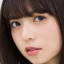

In [15]:
pilImg

In [17]:
buffered = io.BytesIO()
pilImg.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue())

In [18]:
img_str

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABAAEADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDmviLqH9peOr92O6O2xAgz6df/AGb865osMA9eCM0zUbs3OqX8xOWeckn65/xpVUtAp7kZHvWfMbJEuFMe/t/n/Grv2Xz7HfGMgVnRHajIzfKeh9DU2naubEyQvHuVuF3dKlvsaK3UqMoViG/HFRyboSA3zY5B/vCttvD13e